In [1]:
# # RELOAD
# # 파이썬 버전에 따라 상이할 수 있음
# import imp
# import test_package
# imp.reload(test_package)

In [2]:
# 일단 기본적인 라이브러리 호출
import pandas as pd
import numpy as np

In [3]:
# get data
data = pd.read_csv("../전처리/전처리_최종_V3.csv", encoding="CP949")
data.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
# 기준월 기준으로 데이터 그룹화
data_a = data.groupby(['기준월']).mean()

In [5]:
# 소비자 물가지수 차이 구하기 (a.k.a. 인플레이션 비율)
# 올해 소비자 물가지수 - 지난해 소비자물가지수 / 지난해 소비자 물가지수 * 100
data_a['인플레이션율'] = (data_a['소비자물가지수'].diff() / data_a['소비자물가지수'].shift(1)) * 100

# 확인 (불필요 시 주석처리)
data_a

,만기전상환율,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,평균 LTV,평균 DTI,조기상환율,CD금리,미국 실효금리,인플레이션율
기준월,,,,,,,,,,,,,,
2004-06,0.510000,5.040000,52.743,51.435,72.119,794.0,785.79,5.99,60.660000,34.530000,0.510000,3.91,1.03,NaN
2004-07,0.270000,5.020000,52.603,51.040,72.561,858.0,735.34,5.93,61.090000,29.270000,0.270000,3.91,1.26,0.612876
2004-08,0.270000,4.846667,52.394,50.554,73.191,842.0,803.57,5.80,60.920000,31.370000,0.270000,3.70,1.43,0.868235
2004-09,0.380000,4.700000,52.283,50.314,73.191,784.0,835.09,5.63,60.830000,32.417500,0.380000,3.52,1.61,0.000000
2004-10,0.508000,4.600000,52.157,50.090,73.191,801.0,834.84,5.57,60.896000,33.138000,0.508000,3.52,1.76,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02,0.929633,2.478739,100.207,100.197,105.300,800.0,2699.18,3.88,60.585462,30.043799,0.929633,1.50,0.08,0.582673
2022-03,0.839380,2.477937,100.306,100.337,106.060,798.0,2757.65,3.84,60.576111,30.068175,0.825611,1.50,0.20,0.721747
2022-04,0.888984,2.463891,100.517,100.543,106.850,813.0,2695.05,3.90,60.578833,30.048621,0.892509,1.64,0.33,0.744861


- 데이터에 차분을 적용하는 것과 관련하여
- 만기전 상환율 : Target -> 건드리지 마
- 가중평균발행금리, 금리차, 조기상환율, LTV, DTI -> 건드리지 마
- 주택종합 매매가격지수, 전세가격지수 : lag 처리
- 실업자, 소비자물가지수 : lag 처리하고 log 처리
- 예금은행대출금리, CD금리, 코스피 : lag 처리 하고 log 차분

In [6]:
data_a['주택종합 매매가격지수'] = data_a['주택종합 매매가격지수'].shift(1)
data_a['주택종합 전세가격지수'] = data_a['주택종합 전세가격지수'].shift(1)
data_a["예금은행 대출금리"] = np.log(data_a["예금은행 대출금리"]).shift(1)
data_a["소비자물가지수"] = np.log(data_a["소비자물가지수"]).shift(1)
data_a["코스피 월별 종가"] = np.log(data_a["코스피 월별 종가"]).shift(1)
data_a["15-64 실업자 수"] = np.log(data_a["15-64 실업자 수"]).shift(1)
data_a["CD금리"] = np.log(data_a["CD금리"]).shift(1)
data_a['미국 실효금리'] = np.log(data_a['미국 실효금리']).shift(1)

In [7]:
# 결측치 및 중복컬럼 삭제
data_a.dropna(inplace=True)
data_a.drop(columns=['조기상환율'], inplace=True)

In [8]:
# 중간확인 (불필요 시 주석처리 or 삭제)
data_a

,만기전상환율,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,평균 LTV,평균 DTI,CD금리,미국 실효금리,인플레이션율
기준월,,,,,,,,,,,,,
2004-07,0.270000,5.020000,52.743,51.435,4.278318,6.677083,6.666690,1.790091,61.090000,29.270000,1.363537,0.029559,0.612876
2004-08,0.270000,4.846667,52.603,51.040,4.284428,6.754604,6.600333,1.780024,60.920000,31.370000,1.363537,0.231112,0.868235
2004-09,0.380000,4.700000,52.394,50.554,4.293072,6.735780,6.689064,1.757858,60.830000,32.417500,1.308333,0.357674,0.000000
2004-10,0.508000,4.600000,52.283,50.314,4.293072,6.664409,6.727540,1.728109,60.896000,33.138000,1.258461,0.476234,0.000000
2004-11,0.358333,4.515000,52.157,50.090,4.293072,6.685861,6.727240,1.717395,60.976667,33.403333,1.258461,0.565314,-0.602533
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02,0.929633,2.478739,100.000,100.000,4.651004,6.659294,7.887336,1.348073,60.585462,30.043799,0.329304,-2.525729,0.582673
2022-03,0.839380,2.477937,100.207,100.197,4.656813,6.684612,7.900703,1.355835,60.576111,30.068175,0.405465,-2.525729,0.721747
2022-04,0.888984,2.463891,100.306,100.337,4.664005,6.682109,7.922134,1.345472,60.578833,30.048621,0.405465,-1.609438,0.744861


# 기초통계량 1차 분석

In [9]:
# 데이터프레임의 정보, 결측치 확인
data_a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 2004-07 to 2022-06
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   만기전상환율       214 non-null    float64
 1   가중평균발행금리     214 non-null    float64
 2   주택종합 매매가격지수  214 non-null    float64
 3   주택종합 전세가격지수  214 non-null    float64
 4   소비자물가지수      214 non-null    float64
 5   15-64 실업자 수  214 non-null    float64
 6   코스피 월별 종가    214 non-null    float64
 7   예금은행 대출금리    214 non-null    float64
 8   평균 LTV       214 non-null    float64
 9   평균 DTI       214 non-null    float64
 10  CD금리         214 non-null    float64
 11  미국 실효금리      214 non-null    float64
 12  인플레이션율       214 non-null    float64
dtypes: float64(13)
memory usage: 23.4+ KB


In [10]:
# 결측치 확인
data_a.isna().sum()

만기전상환율         0
가중평균발행금리       0
주택종합 매매가격지수    0
주택종합 전세가격지수    0
소비자물가지수        0
15-64 실업자 수    0
코스피 월별 종가      0
예금은행 대출금리      0
평균 LTV         0
평균 DTI         0
CD금리           0
미국 실효금리        0
인플레이션율         0
dtype: int64

In [11]:
# 기초 통계 조회
data_a.describe()

,만기전상환율,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,평균 LTV,평균 DTI,CD금리,미국 실효금리,인플레이션율
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,2.125790,3.773027,70.835033,72.083953,4.496383,6.771244,7.513644,1.415123,59.874064,32.485376,0.866499,-0.777562,0.190444
std,1.295680,0.954468,11.059051,15.072584,0.106253,0.131812,0.288032,0.314779,1.158292,1.313916,0.542269,1.532233,0.352039
min,0.037500,2.447768,51.567000,49.086000,4.278318,6.527958,6.600333,0.871293,57.812188,29.270000,-0.462035,-2.995732,-0.744313
25%,1.236738,2.869294,63.628000,56.417250,4.414212,6.677712,7.395603,1.152934,59.055704,31.498212,0.490109,-2.207275,-0.067598
50%,1.748847,3.411875,70.716000,73.672000,4.531157,6.748760,7.583812,1.360977,59.968668,32.773154,0.974560,-1.267889,0.181225
75%,2.753005,4.801858,77.204250,85.564000,4.584640,6.856462,7.652164,1.695616,60.562161,33.592059,1.264127,0.696888,0.404551
max,9.681872,5.236765,100.768000,100.814000,4.678049,7.078342,8.100671,2.025513,62.019524,34.461733,1.796747,1.660131,1.188525


array([[<AxesSubplot:xlabel='가중평균발행금리', ylabel='가중평균발행금리'>,
        <AxesSubplot:xlabel='주택종합 매매가격지수', ylabel='가중평균발행금리'>,
        <AxesSubplot:xlabel='주택종합 전세가격지수', ylabel='가중평균발행금리'>,
        <AxesSubplot:xlabel='소비자물가지수', ylabel='가중평균발행금리'>,
        <AxesSubplot:xlabel='15-64 실업자 수', ylabel='가중평균발행금리'>,
        <AxesSubplot:xlabel='코스피 월별 종가', ylabel='가중평균발행금리'>,
        <AxesSubplot:xlabel='예금은행 대출금리', ylabel='가중평균발행금리'>,
        <AxesSubplot:xlabel='평균 LTV', ylabel='가중평균발행금리'>,
        <AxesSubplot:xlabel='평균 DTI', ylabel='가중평균발행금리'>,
        <AxesSubplot:xlabel='CD금리', ylabel='가중평균발행금리'>,
        <AxesSubplot:xlabel='미국 실효금리', ylabel='가중평균발행금리'>,
        <AxesSubplot:xlabel='인플레이션율', ylabel='가중평균발행금리'>],
       [<AxesSubplot:xlabel='가중평균발행금리', ylabel='주택종합 매매가격지수'>,
        <AxesSubplot:xlabel='주택종합 매매가격지수', ylabel='주택종합 매매가격지수'>,
        <AxesSubplot:xlabel='주택종합 전세가격지수', ylabel='주택종합 매매가격지수'>,
        <AxesSubplot:xlabel='소비자물가지수', ylabel='주택종합 매매가격지수'>,
        <AxesSubplot:xl

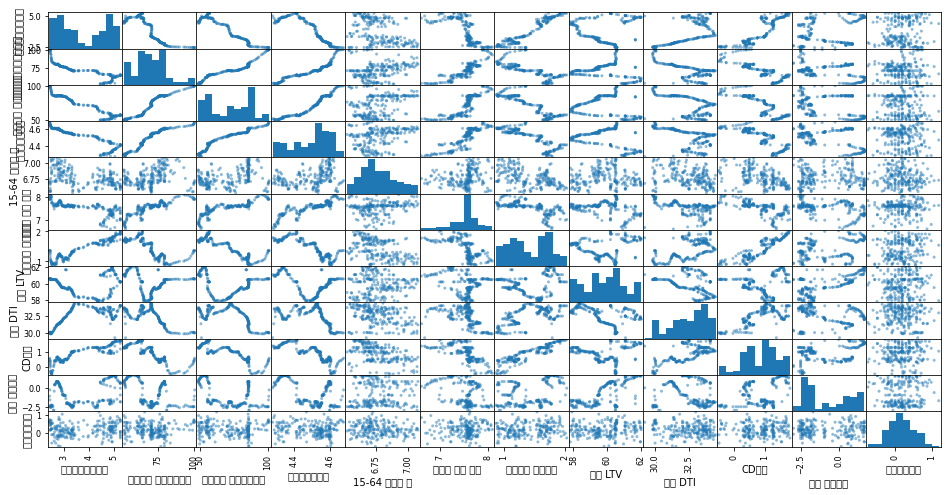

In [12]:
# 히트맵 대신 산점도를 한번 볼까요 (참고용으로만 봅시다)
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

attributes = ['가중평균발행금리', '주택종합 매매가격지수', '주택종합 전세가격지수', '소비자물가지수', '15-64 실업자 수', '코스피 월별 종가', '예금은행 대출금리', '평균 LTV', '평균 DTI', 'CD금리', '미국 실효금리', '인플레이션율']
scatter_matrix(data_a[attributes], figsize=(16,8))

In [13]:
# 아주 간단하게 상관관계 분석
data_a.corr()

,만기전상환율,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,평균 LTV,평균 DTI,CD금리,미국 실효금리,인플레이션율
만기전상환율,1.000000,-0.212187,0.071402,0.212557,0.265383,0.091006,0.221319,-0.333767,-0.471657,0.328658,-0.120067,-0.482538,-0.208592
가중평균발행금리,-0.212187,1.000000,-0.859188,-0.960978,-0.905004,-0.408910,-0.737516,0.945414,0.087004,0.622796,0.877357,0.330174,0.122854
주택종합 매매가격지수,0.071402,-0.859188,1.000000,0.950540,0.935405,0.224822,0.863680,-0.750758,-0.152847,-0.665767,-0.807315,-0.440674,0.013417
주택종합 전세가격지수,0.212557,-0.960978,0.950540,1.000000,0.966397,0.332931,0.842150,-0.882945,-0.166292,-0.623201,-0.852136,-0.412355,-0.072632
소비자물가지수,0.265383,-0.905004,0.935405,0.966397,1.000000,0.327146,0.871575,-0.843832,-0.359738,-0.501414,-0.809405,-0.516597,-0.098710
15-64 실업자 수,0.091006,-0.408910,0.224822,0.332931,0.327146,1.000000,0.187947,-0.489313,0.009945,-0.334774,-0.488598,-0.014297,-0.101409
코스피 월별 종가,0.221319,-0.737516,0.863680,0.842150,0.871575,0.187947,1.000000,-0.656381,-0.295453,-0.482773,-0.658527,-0.408512,0.015323
예금은행 대출금리,-0.333767,0.945414,-0.750758,-0.882945,-0.843832,-0.489313,-0.656381,1.000000,0.104470,0.583704,0.902146,0.344381,0.166505
평균 LTV,-0.471657,0.087004,-0.152847,-0.166292,-0.359738,0.009945,-0.295453,0.104470,1.000000,-0.435826,0.068336,0.702657,0.061039
평균 DTI,0.328658,0.622796,-0.665767,-0.623201,-0.501414,-0.334774,-0.482773,0.583704,-0.435826,1.000000,0.704716,-0.110495,-0.065775


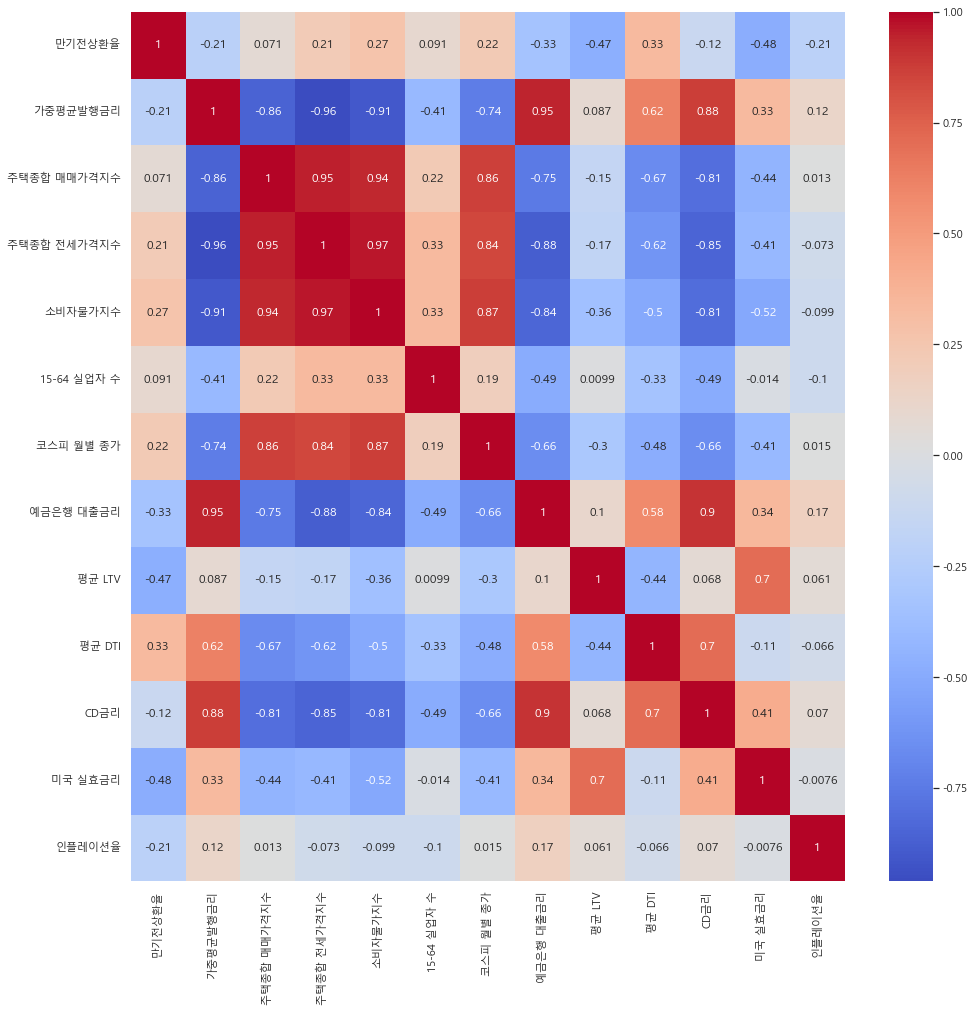

In [14]:
# 히트맵을 위한 라이브러리 호출
import matplotlib.pyplot as plt
import seaborn as sns

# 히트맵 드로잉
sns.set(rc={'figure.figsize':(16,16)}) # 히트맵 크기 설정
plt.rc('font', family='Malgun Gothic') # 한글 깨짐 설정
sns.heatmap(data_a.corr(), annot=True, cmap='coolwarm') # 히트맵 그리기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨지는 걸 방지함
plt.show()

In [15]:
# VIF 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_a.values, i) for i in range(data_a.shape[1])]
vif["features"] = data_a.columns

vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,31785.566037,소비자물가지수
1,4847.844135,15-64 실업자 수
2,4814.292406,평균 DTI
3,4000.212272,코스피 월별 종가
4,3923.623425,평균 LTV
5,2447.090200,주택종합 전세가격지수
6,1783.942514,주택종합 매매가격지수
7,843.062418,가중평균발행금리
8,651.712865,예금은행 대출금리
9,50.400413,CD금리


In [16]:
# test_package의 find_vif를 활용하는 방법

from test_package import find_vif
find_vif(data_a)

      VIF Factor     features
0   31785.566037      소비자물가지수
1    4847.844135  15-64 실업자 수
2    4814.292406       평균 DTI
3    4000.212272    코스피 월별 종가
4    3923.623425       평균 LTV
5    2447.090200  주택종합 전세가격지수
6    1783.942514  주택종합 매매가격지수
7     843.062418     가중평균발행금리
8     651.712865    예금은행 대출금리
9      50.400413         CD금리
10     13.172614       만기전상환율
11      5.683667      미국 실효금리
12      1.497798       인플레이션율


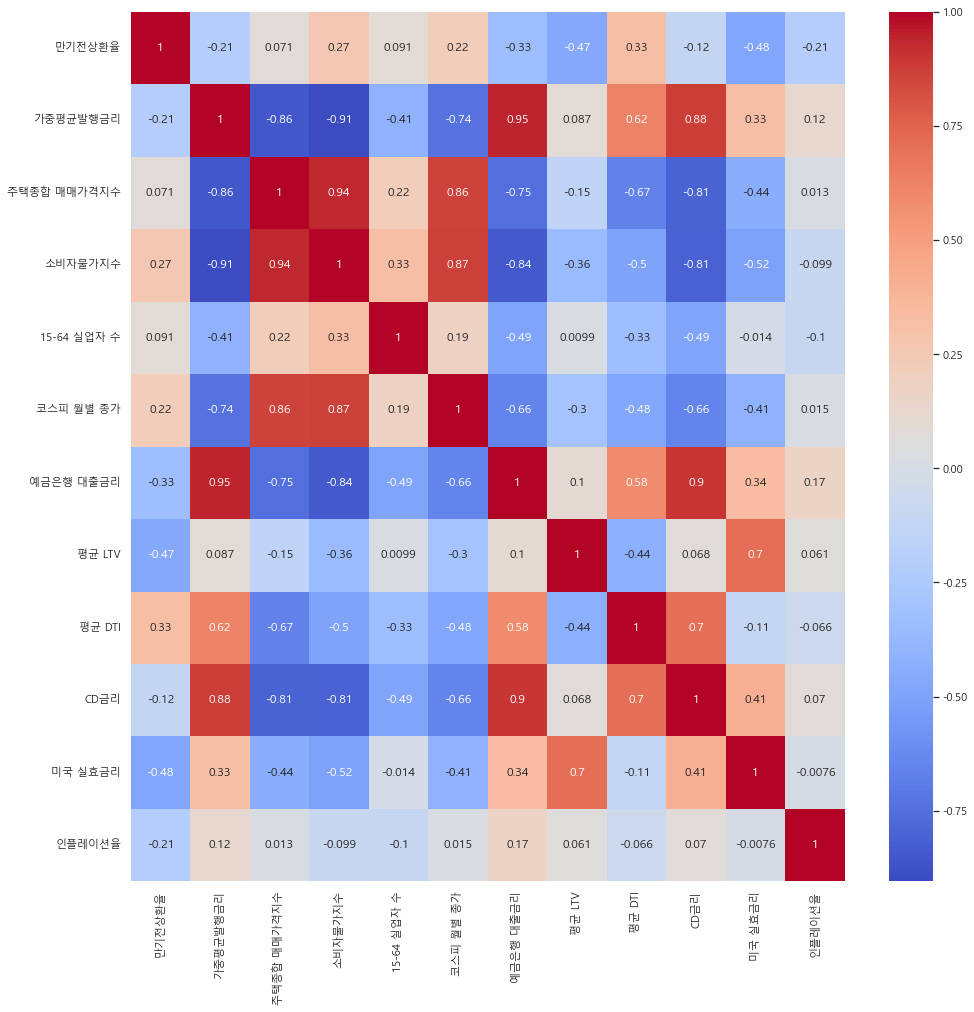

In [17]:
# 일단 주택 관련 지수는 매매가격만 있으면 충분할 것 같아요
data_b = data_a.copy()
data_b.drop(columns=['주택종합 전세가격지수'], inplace=True)

# 상관관계 재확인
sns.set(rc={'figure.figsize':(16,16)}) # 히트맵 크기 설정
plt.rc('font', family='Malgun Gothic') # 한글 깨짐 설정
sns.heatmap(data_b.corr(), annot=True, cmap='coolwarm') # 히트맵 그리기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨지는 걸 방지함
plt.show()

In [18]:
# VIF 재확인
find_vif(data_b)

      VIF Factor     features
0   28167.483968      소비자물가지수
1    4842.995668  15-64 실업자 수
2    4748.556078       평균 DTI
3    3998.005372    코스피 월별 종가
4    3801.394933       평균 LTV
5    1080.603742  주택종합 매매가격지수
6     650.112105    예금은행 대출금리
7     377.570347     가중평균발행금리
8      49.719790         CD금리
9      11.623356       만기전상환율
10      5.582192      미국 실효금리
11      1.494985       인플레이션율


#### Scaling
- Standard : 데이터를 표준정규분포 모양으로 만듬 -> 데이터 특성을 반영 못 하니까 못 씁니다
- Robuster : 아웃라이어를 없애버림 -> 데이터 특성에 따라 아웃라이어가 존재하는 게 의미있을 수도 있으니 못 씁니다
- Min-Max : 아웃라이어 살리고 데이터 분포 살리고 (남는 게 이거 뿐이네요)

In [19]:
# Min - Max Scaler
from sklearn.preprocessing import MinMaxScaler

data_c = data_b.copy().reset_index()

scaler = MinMaxScaler()
mm_temp = data_c.drop(columns=['기준월','만기전상환율'])
colnames = data_c.columns.drop(['기준월','만기전상환율'])

# Training
# scaler.fit(mm_df)

# Traning & Scaling
mm_data = scaler.fit_transform(mm_temp)

mm_result = pd.DataFrame(mm_data, columns=colnames)
mm_result

,가중평균발행금리,주택종합 매매가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,평균 LTV,평균 DTI,CD금리,미국 실효금리,인플레이션율
0,0.922279,0.023902,0.000000,0.270948,0.044228,0.796034,0.779071,0.000000,0.808211,0.649781,0.702174
1,0.860130,0.021056,0.015285,0.411797,0.000000,0.787312,0.738665,0.404489,0.808211,0.693071,0.834290
2,0.807542,0.016809,0.036912,0.377595,0.059141,0.768107,0.717274,0.606252,0.783771,0.720255,0.385088
3,0.771687,0.014553,0.036912,0.247920,0.084785,0.742334,0.732961,0.745031,0.761692,0.745719,0.385088
4,0.741210,0.011992,0.036912,0.286896,0.084586,0.733051,0.752134,0.796137,0.761692,0.764852,0.073353
...,...,...,...,...,...,...,...,...,...,...,...
209,0.011105,0.984391,0.932341,0.238626,0.857809,0.413075,0.659152,0.149045,0.350339,0.100949,0.686548
210,0.010817,0.988598,0.946876,0.284627,0.866718,0.419800,0.656930,0.153740,0.384057,0.100949,0.758501
211,0.005781,0.990610,0.964867,0.280079,0.881002,0.410822,0.657576,0.149973,0.384057,0.297752,0.770460
212,0.000000,0.994898,0.983432,0.313914,0.865698,0.424255,0.650819,0.141091,0.423561,0.405310,0.728874


In [20]:
# Min-Max 스케일링 잘 됐는지 확인 겸 통계 데이터 확인
mm_result.describe()

,가중평균발행금리,주택종합 매매가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,평균 LTV,평균 DTI,CD금리,미국 실효금리,인플레이션율
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,0.475174,0.391619,0.545529,0.442031,0.608737,0.471166,0.490067,0.619326,0.588164,0.476425,0.483619
std,0.342226,0.224773,0.265811,0.239491,0.191978,0.272720,0.275303,0.253078,0.240071,0.329098,0.182136
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151139,0.245137,0.339965,0.272091,0.530060,0.244010,0.295559,0.429185,0.421530,0.169347,0.350115
50%,0.345682,0.389199,0.632525,0.401178,0.655505,0.424255,0.512553,0.674756,0.636004,0.371111,0.478849
75%,0.844064,0.521072,0.766320,0.596864,0.701062,0.714181,0.653614,0.832489,0.764200,0.793112,0.594392
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
# 설마 결측치 없겠죠
mm_result.isna().sum()

가중평균발행금리       0
주택종합 매매가격지수    0
소비자물가지수        0
15-64 실업자 수    0
코스피 월별 종가      0
예금은행 대출금리      0
평균 LTV         0
평균 DTI         0
CD금리           0
미국 실효금리        0
인플레이션율         0
dtype: int64

In [22]:
# 최적의 알파값을 찾기 위한 GridSearch 수행
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score

# ...을 하기 전에 피처랑 타겟 설정
feature_data = mm_result # ALL

# 주요 요인 별로 나눈 이유 -> 위에서 VIF를 보시면 아시겠지만...
feature_data_A = mm_result[['가중평균발행금리', '예금은행 대출금리', '미국 실효금리']] # 금리 요인
feature_data_B = mm_result[['주택종합 매매가격지수', '평균 LTV', '평균 DTI']] # 부동산 요인
feature_data_C = mm_result[['15-64 실업자 수', '인플레이션율', '코스피 월별 종가']] # 거시경제 요인
target = data_a['만기전상환율']

In [23]:
# VIF after Min-Max Scaling
# 확실히 스케일링을 해주니까 공선성이 개선이 되긴 된 것 같...다...

find_vif(feature_data)
print('\n')
find_vif(feature_data_A)
print('\n')
find_vif(feature_data_B)
print('\n')
find_vif(feature_data_C)

    VIF Factor     features
0   261.241836      소비자물가지수
1   188.899086  주택종합 매매가격지수
2   100.422620    예금은행 대출금리
3    89.887638         CD금리
4    58.217633    코스피 월별 종가
5    51.457136     가중평균발행금리
6    41.203057       평균 DTI
7    14.545115       평균 LTV
8    13.148261      미국 실효금리
9     8.951877       인플레이션율
10    7.608924  15-64 실업자 수


   VIF Factor   features
0   28.404601  예금은행 대출금리
1   24.658323   가중평균발행금리
2    2.971325    미국 실효금리


   VIF Factor     features
0    2.659064       평균 LTV
1    2.375083       평균 DTI
2    2.321795  주택종합 매매가격지수


   VIF Factor     features
0    7.141412    코스피 월별 종가
1    5.110120       인플레이션율
2    4.081643  15-64 실업자 수


In [24]:
# 좋습니다 이제 알파를 찾아봅시다

from test_package import find_best_alpha
# find_best_alpha(type, data, target)
# type : ridge, lasso, elastic

find_best_alpha('ridge', feature_data[:161], target[:161])
find_best_alpha('lasso', feature_data[:161], target[:161])
find_best_alpha('elastic', feature_data[:161], target[:161])

find_best_alpha('ridge', feature_data_A[:161], target[:161])
find_best_alpha('lasso', feature_data_A[:161], target[:161])
find_best_alpha('elastic', feature_data_A[:161], target[:161])

find_best_alpha('ridge', feature_data_B[:161], target[:161])
find_best_alpha('lasso', feature_data_B[:161], target[:161])
find_best_alpha('elastic', feature_data_B[:161], target[:161])

find_best_alpha('ridge', feature_data_C[:161], target[:161])
find_best_alpha('lasso', feature_data_C[:161], target[:161])
find_best_alpha('elastic', feature_data_C[:161], target[:161])

Type : ridge | {'alpha': 1.0} | MSE : 0.2886123751534881 | RMSE: 0.5372265584960297
Type : lasso | {'alpha': 0.01} | MSE : 0.21164534165833393 | RMSE: 0.46004928177134885
Type : elastic | {'alpha': 0.01} | MSE : 0.14391019205910932 | RMSE: 0.3793549684123161
Type : ridge | {'alpha': 1.0} | MSE : 0.323795914966654 | RMSE: 0.5690306801629013
Type : lasso | {'alpha': 0.03} | MSE : 0.24074767269766575 | RMSE: 0.49066044541787324
Type : elastic | {'alpha': 0.03} | MSE : 0.27058722264366186 | RMSE: 0.5201799906221517
Type : ridge | {'alpha': 1.0} | MSE : 2.303702039188059 | RMSE: 1.5177951242470307
Type : lasso | {'alpha': 0.04} | MSE : 2.060709921739903 | RMSE: 1.435517301093896
Type : elastic | {'alpha': 0.02} | MSE : 2.2534023118446855 | RMSE: 1.5011336755414841
Type : ridge | {'alpha': 0.24} | MSE : 1.801165039298644 | RMSE: 1.342074900778136
Type : lasso | {'alpha': 0.01} | MSE : 1.9356329844828846 | RMSE: 1.3912702772944172
Type : elastic | {'alpha': 0.01} | MSE : 1.9762840605631222 | 

In [25]:
# 요인 별 RMSE 스코어 계산

import test_package as tp
# Hand-made Function
# tp.score_checker(type, data, target, alpha)
# type = 'ridge', 'lasso', 'elastic'

print('전체 요인')
tp.score_checker('ridge', feature_data[:161], target[:161], 0.82)
tp.score_checker('lasso', feature_data[:161], target[:161], 0.23)
tp.score_checker('elastic', feature_data[:161], target[:161], 0.46)

print('\n금리 요인')
tp.score_checker('ridge', feature_data_A[:161], target[:161], 1.0)
tp.score_checker('lasso', feature_data_A[:161], target[:161], 0.02)
tp.score_checker('elastic', feature_data_A[:161], target[:161], 0.01)

print('\n부동산 요인\n')
tp.score_checker('ridge', feature_data_B[:161], target[:161], 1.0)
tp.score_checker('lasso', feature_data_B[:161], target[:161], 0.04)
tp.score_checker('elastic', feature_data_B[:161], target[:161], 0.02)

print('\n거시경제 요인')
tp.score_checker('ridge', feature_data_C[:161], target[:161], 0.24)
tp.score_checker('lasso', feature_data_C[:161], target[:161], 0.01)
tp.score_checker('elastic', feature_data_C[:161], target[:161], 0.01)

# 전반적으로 2번째 폴드가 점수는 좋아보임
# 전반적으로 1.3 ~ 1.4 스코어..

전체 요인
Alpha : 0.82
ridge Negative MSE score : [0.446 0.201 0.181 1.137 4.581]
ridge RMSE scores : [0.668 0.448 0.425 1.066 2.14 ]
ridge AVG RMSE : 0.950

Alpha : 0.23
lasso Negative MSE score : [2.151 1.78  0.219 3.145 4.56 ]
lasso RMSE scores : [1.467 1.334 0.468 1.773 2.135]
lasso AVG RMSE : 1.435

Alpha : 0.46
elastic Negative MSE score : [2.276 1.911 0.209 3.154 4.657]
elastic RMSE scores : [1.509 1.382 0.457 1.776 2.158]
elastic AVG RMSE : 1.456


금리 요인
Alpha : 1.0
ridge Negative MSE score : [0.448 0.274 0.2   1.217 2.682]
ridge RMSE scores : [0.669 0.524 0.447 1.103 1.638]
ridge AVG RMSE : 0.876

Alpha : 0.02
lasso Negative MSE score : [0.425 0.245 0.179 1.241 2.632]
lasso RMSE scores : [0.652 0.495 0.423 1.114 1.622]
lasso AVG RMSE : 0.861

Alpha : 0.01
elastic Negative MSE score : [0.434 0.267 0.197 1.223 2.695]
elastic RMSE scores : [0.659 0.516 0.443 1.106 1.642]
elastic AVG RMSE : 0.873


부동산 요인

Alpha : 1.0
ridge Negative MSE score : [0.341 1.219 0.683 1.91  3.485]
ridge RM

In [26]:
# Train Set : Test Set = 75% : 25%
# Test SET 20%일 경우 코로나 시국 데이터가 좀 더 반영됨

# feature_data_A : 금리 요인 (alpha = 0.01)
# feature_data_B : 부동산 요인 (alpha = 0.02)
# feature_data_C : 거시경제 요인 (alpha = 0.01)
# feature_data : 모든 요인 고려 (alpha = 0.01)

###########################################
# 가장 잘 나온 모델로 예측이라는 걸 해봅시다 #
###########################################

xa_train, xa_test, ya_train, ya_test = train_test_split(feature_data_A, target, test_size=0.25, random_state=25)
xa_model = ElasticNet(alpha=0.01, random_state=25)
xa_model.fit(xa_train, ya_train)
xa_pred = xa_model.predict(xa_test)

xb_train, xb_test, yb_train, yb_test = train_test_split(feature_data_B, target, test_size=0.25, random_state=25)
xb_model = ElasticNet(alpha=0.02, random_state=25)
xb_model.fit(xb_train, yb_train)
xb_pred = xb_model.predict(xb_test)

xc_train, xc_test, yc_train, yc_test = train_test_split(feature_data_C, target, test_size=0.25, random_state=25)
xc_model = ElasticNet(alpha=0.01, random_state=25)
xc_model.fit(xc_train, yc_train)
xc_pred = xc_model.predict(xc_test)

xd_train, xd_test, yd_train, yd_test = train_test_split(feature_data, target, test_size=0.25, random_state=25)
# xd_train = feature_data[:161]
# xd_test = feature_data[161:]
# yd_train = target[:161]
# yd_test = target[161:]

xd_model = ElasticNet(alpha=0.01, random_state=25)
xd_model.fit(xd_train, yd_train)
xd_pred = xd_model.predict(xd_test)

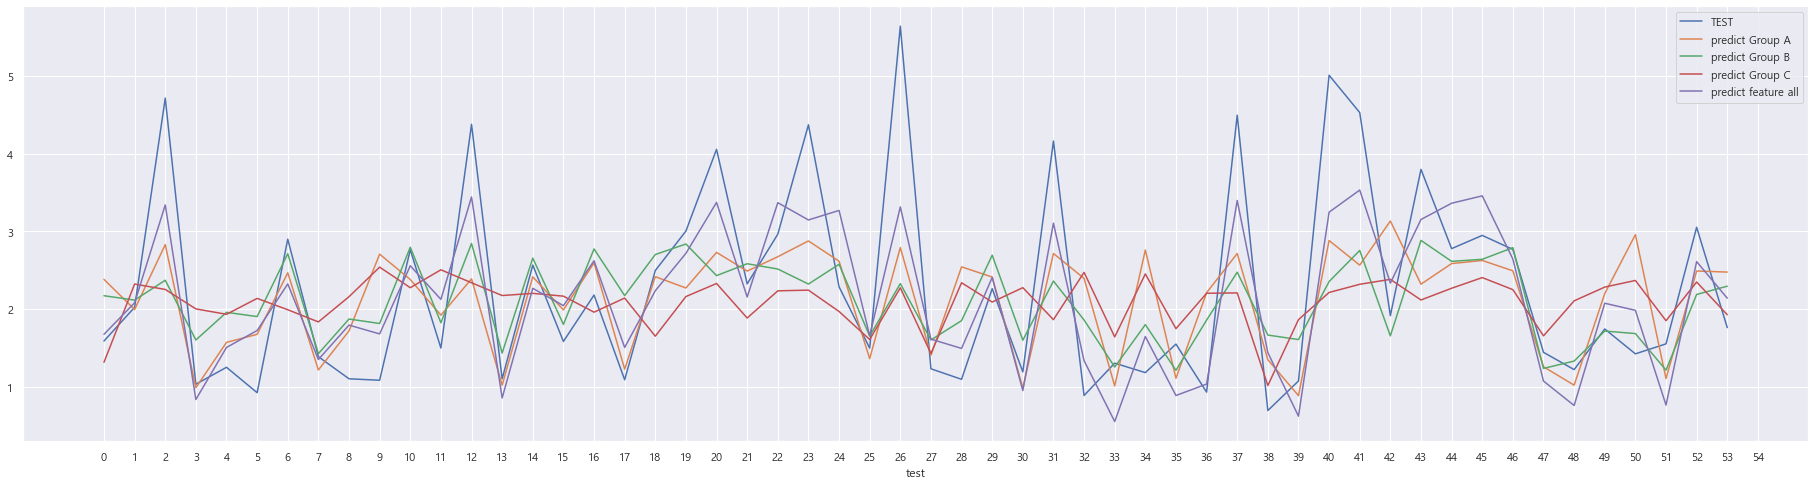

In [27]:
# 쟤네를 그려보면 이렇게 됩니다
fig, axs = plt.subplots(1,1, figsize=(32,8))
plt.xlabel("test")
plt.xticks(range(55), range(55))
plt.plot(yd_test, label="TEST")
plt.plot(xa_pred, label="predict Group A")
plt.plot(xb_pred, label="predict Group B")
plt.plot(xc_pred, label="predict Group C")
plt.plot(xd_pred, label="predict feature all")

plt.legend(loc='upper right')
plt.show()

- 따로따로 봅시다

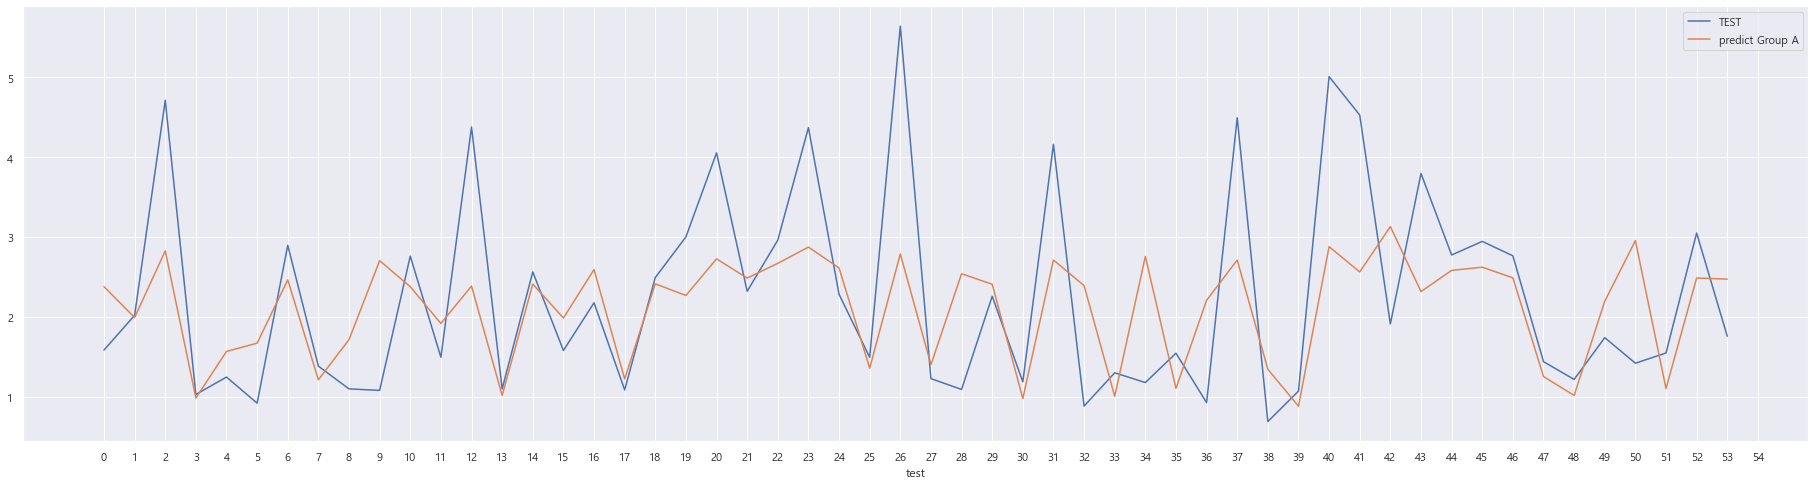

In [28]:
fig, axs = plt.subplots(1,1, figsize=(32,8))
plt.xlabel("test")
plt.xticks(range(55), range(55))
plt.plot(ya_test, label="TEST")
plt.plot(xa_pred, label="predict Group A")
plt.legend(loc='upper right')
plt.show()

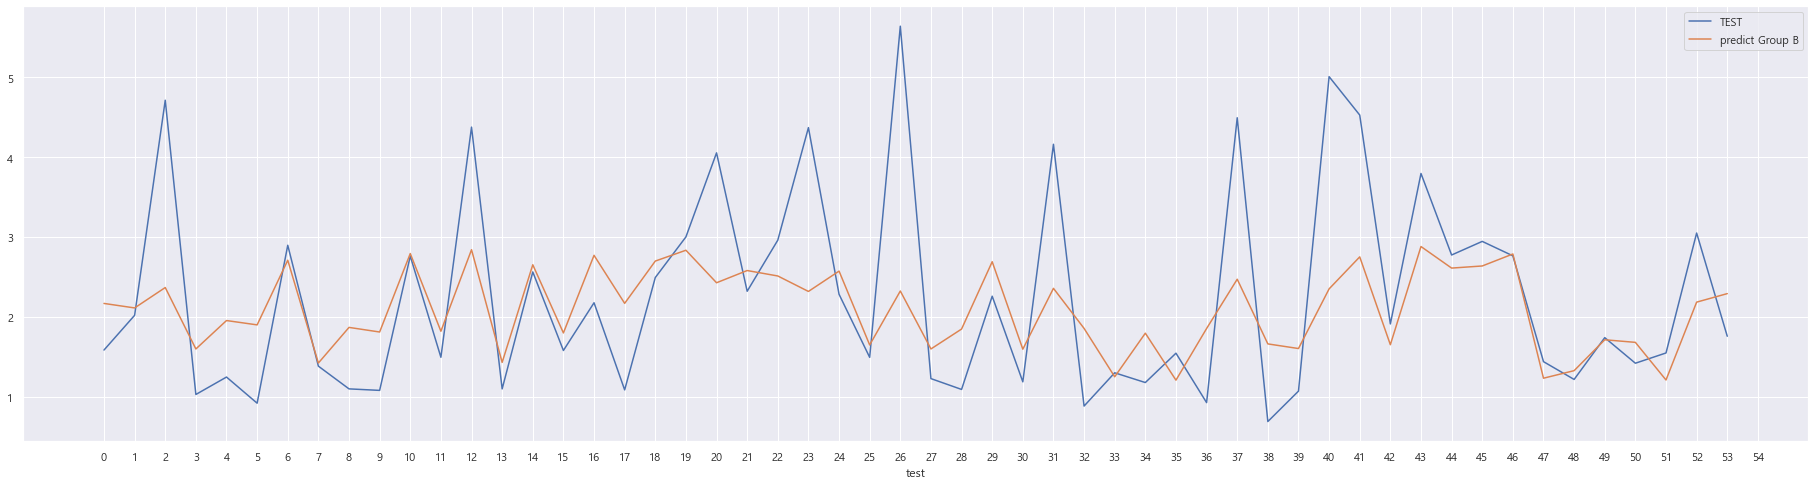

In [29]:
fig, axs = plt.subplots(1,1, figsize=(32,8))
plt.xlabel("test")
plt.xticks(range(55), range(55))
plt.plot(yb_test, label="TEST")
plt.plot(xb_pred, label="predict Group B")
plt.legend(loc='upper right')
plt.show()

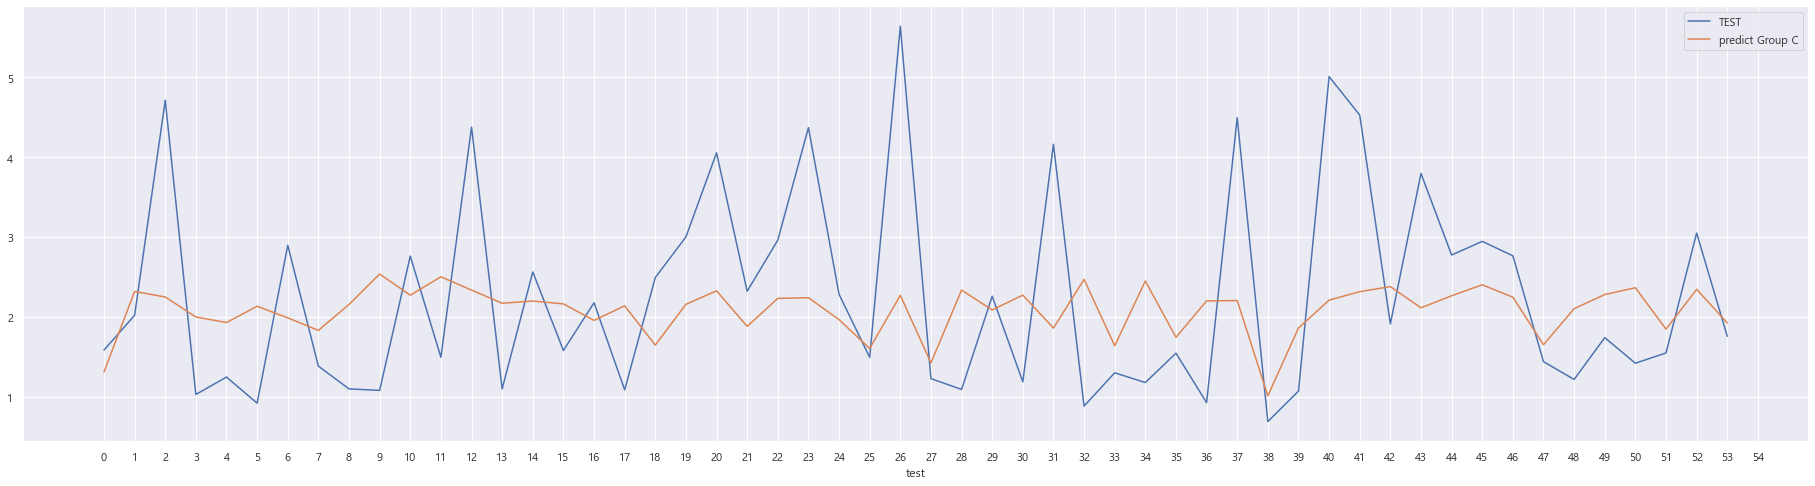

In [30]:
fig, axs = plt.subplots(1,1, figsize=(32,8))
plt.xlabel("test")
plt.xticks(range(55), range(55))
plt.plot(yc_test, label="TEST")
plt.plot(xc_pred, label="predict Group C")
plt.legend(loc='upper right')
plt.show()

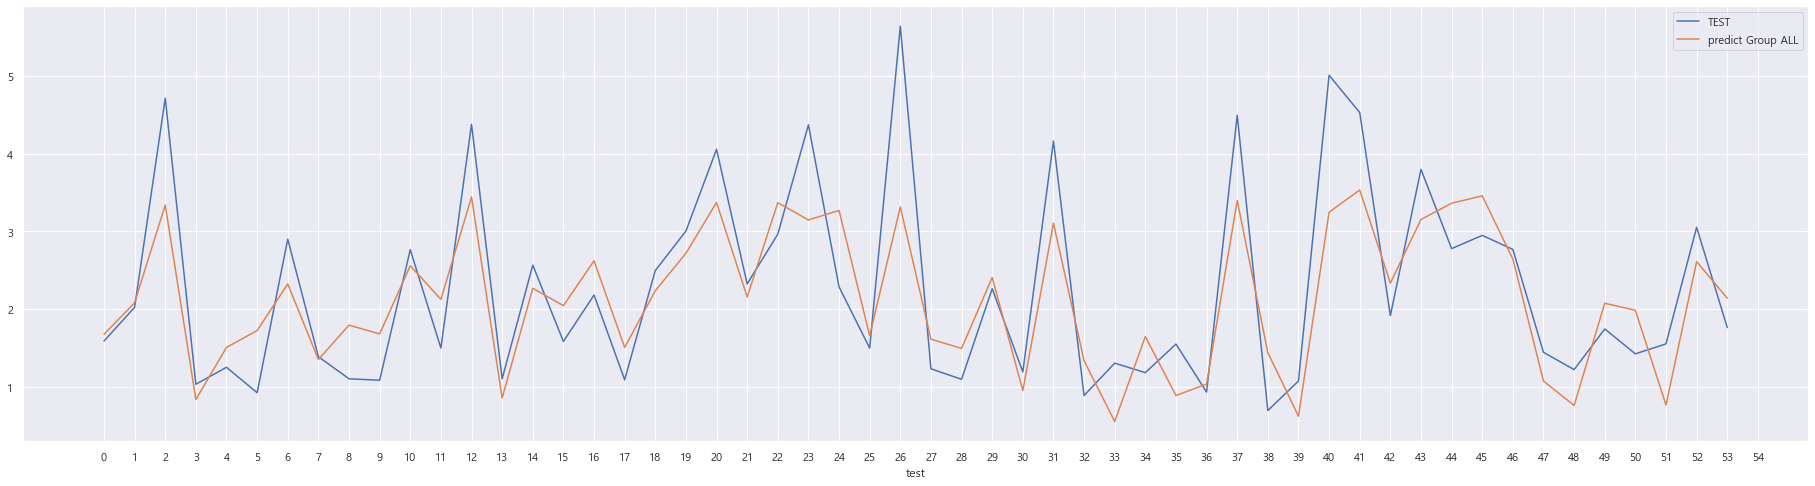

In [31]:
fig, axs = plt.subplots(1,1, figsize=(32,8))
plt.xlabel("test")
plt.xticks(range(55), range(55))
# plt.plot(target, label="Target")
plt.plot(yd_test, label="TEST")
plt.plot(xd_pred, label="predict Group ALL")
plt.legend(loc='upper right')
plt.show()

In [32]:
# 그래서 RMSE가 얼마나 나왔을까

from sklearn.metrics import mean_squared_error, accuracy_score

mse_a = mean_squared_error(ya_test, xa_pred)
rmse_a = mse_a ** 0.5

mse_b = mean_squared_error(yb_test, xb_pred)
rmse_b = mse_b ** 0.5

mse_c = mean_squared_error(yc_test, xc_pred)
rmse_c = mse_c ** 0.5

mse_all = mean_squared_error(yd_test, xd_pred)
rmse_all = mse_all ** 0.5

print(f'금리 요인 RMSE : {rmse_a:.3f}')
print(f'부동산 요인 RMSE : {rmse_b:.3f}')
print(f'거시경제 요인 RMSE : {rmse_c:.3f}')
print(f'전체 요인 RMSE : {rmse_all:.3f}')

금리 요인 RMSE : 1.020
부동산 요인 RMSE : 1.015
거시경제 요인 RMSE : 1.231
전체 요인 RMSE : 0.701


In [33]:
## elasticnet 잘 됐는지 스코어 확인해보기

print(f'전체 요인 훈련셋 점수 : {xd_model.score(xd_train, yd_train):.3f}')
print(f'전체 요인 테스트 점수 : {xd_model.score(xd_test, yd_test):.3f}\n')

print(f'금리 요인 훈련셋 점수 : {xb_model.score(xb_train, yb_train):.3f}')
print(f'금리 요인 테스트 점수 : {xb_model.score(xb_test, yb_test):.3f}\n')

print(f'부동산 요인 훈련셋 점수 : {xc_model.score(xc_train, yc_train):.3f}')
print(f'부동산 요인 테스트 점수 : {xc_model.score(xc_test, yc_test):.3f}\n')

print(f'거시경제 요인 훈련셋 점수 : {xa_model.score(xa_train, ya_train):.3f}')
print(f'거시경제 요인 테스트 점수 : {xa_model.score(xa_test, ya_test):.3f}')


전체 요인 훈련셋 점수 : 0.535
전체 요인 테스트 점수 : 0.694

금리 요인 훈련셋 점수 : 0.206
금리 요인 테스트 점수 : 0.358

부동산 요인 훈련셋 점수 : 0.095
부동산 요인 테스트 점수 : 0.056

거시경제 요인 훈련셋 점수 : 0.306
거시경제 요인 테스트 점수 : 0.352


- 위에 있는 건 아까 best alpha 구했을 때하고 비교하면 좋을 거 같고

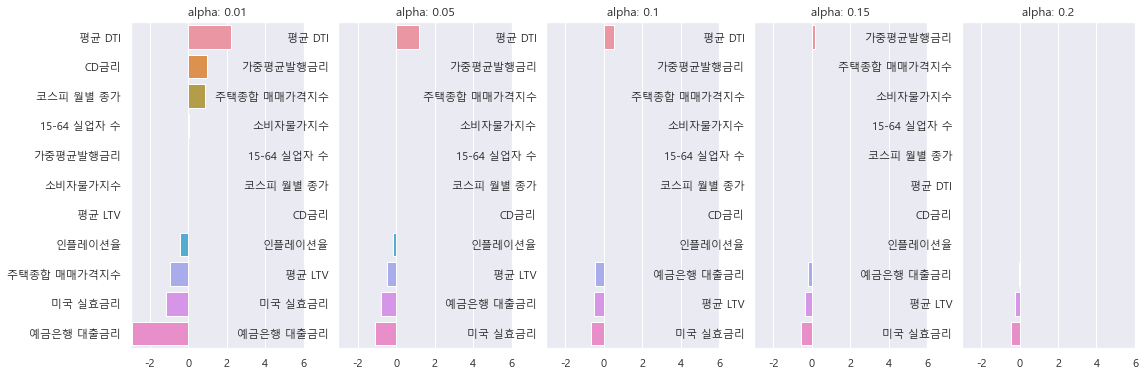

             alpha: 0.01  alpha: 0.05  alpha: 0.1  alpha: 0.15  alpha: 0.2
평균 DTI          2.200902     1.182145    0.513585     0.181450    0.000000
CD금리            0.969983     0.000000   -0.000000    -0.000000   -0.000000
코스피 월별 종가       0.874415     0.000000    0.000000     0.000000    0.000000
15-64 실업자 수     0.035307     0.000000    0.000000     0.000000    0.000000
가중평균발행금리        0.000000    -0.000000   -0.000000    -0.000000   -0.000000
소비자물가지수        -0.000000     0.000000    0.000000     0.000000    0.000000
평균 LTV         -0.000000    -0.472805   -0.440078    -0.335746   -0.227537
인플레이션율         -0.431937    -0.175324   -0.000000    -0.000000   -0.000000
주택종합 매매가격지수    -0.975704    -0.000000   -0.000000    -0.000000    0.000000
미국 실효금리        -1.151405    -0.789140   -0.674141    -0.550574   -0.432978
예금은행 대출금리      -2.940002    -1.114637   -0.514459    -0.202010   -0.013169


In [34]:
# 문득 이런 생각
# Best alpha로 RMSE를 찾긴 찾았는데
# 그래프 뭐가 대충 일치하는 게 보였어. 근데 전체 요인이 Best야
# 알파를 좀 더 변화시켜보자. 뭐가 큰 영향을 준 걸까.
# 이거도 요인 별로 하나하나 돌려봅시다

from test_package import check_coeff

# 구하고 싶은 알파는 따로 입력하고
alphas = [0.01, 0.05, 0.1, 0.15, 0.2]

# check_coeff(type, data, target, alpha)
# type = 'ridge', 'lasso', 'elastic'
check_coeff('elastic', feature_data, target, alphas)

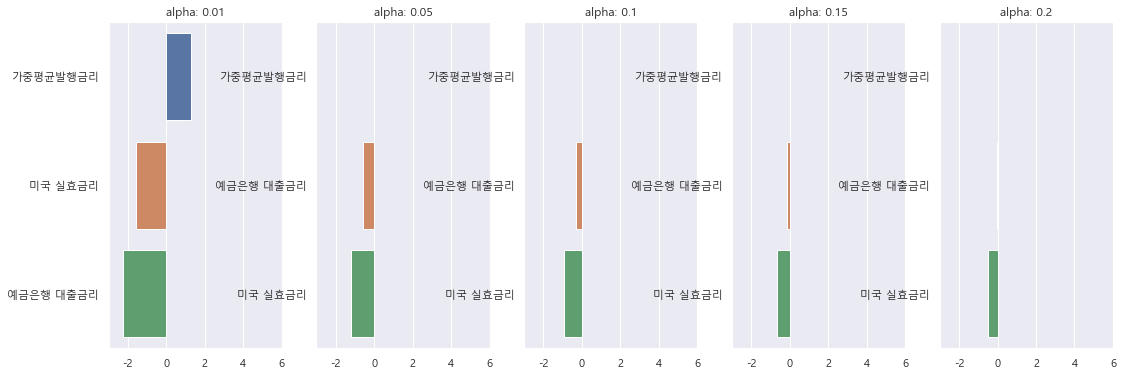

           alpha: 0.01  alpha: 0.05  alpha: 0.1  alpha: 0.15  alpha: 0.2
가중평균발행금리      1.280834     0.000000   -0.000000    -0.000000   -0.000000
미국 실효금리      -1.583582    -1.225996   -0.919503    -0.686008   -0.502674
예금은행 대출금리    -2.229063    -0.552078   -0.315256    -0.142817   -0.011056


In [35]:
# 구하고 싶은 알파는 따로 입력하고
alphas = [0.01, 0.05, 0.1, 0.15, 0.2]

# check_coeff(type, data, target, alpha)
# type = 'ridge', 'lasso', 'elastic'
check_coeff('elastic', feature_data_A, target, alphas)

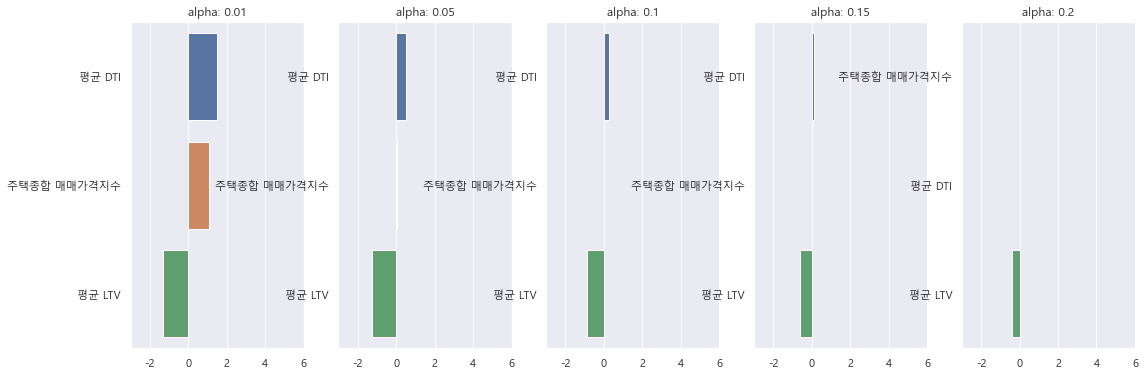

             alpha: 0.01  alpha: 0.05  alpha: 0.1  alpha: 0.15  alpha: 0.2
평균 DTI          1.487378     0.517204    0.272063     0.103193    0.000000
주택종합 매매가격지수     1.070551     0.044402    0.000000     0.000000    0.000000
평균 LTV         -1.335536    -1.258574   -0.870820    -0.593851   -0.384502


In [36]:
# 구하고 싶은 알파는 따로 입력하고
alphas = [0.01, 0.05, 0.1, 0.15, 0.2]

# check_coeff(type, data, target, alpha)
# type = 'ridge', 'lasso', 'elastic'
check_coeff('elastic', feature_data_B, target, alphas)

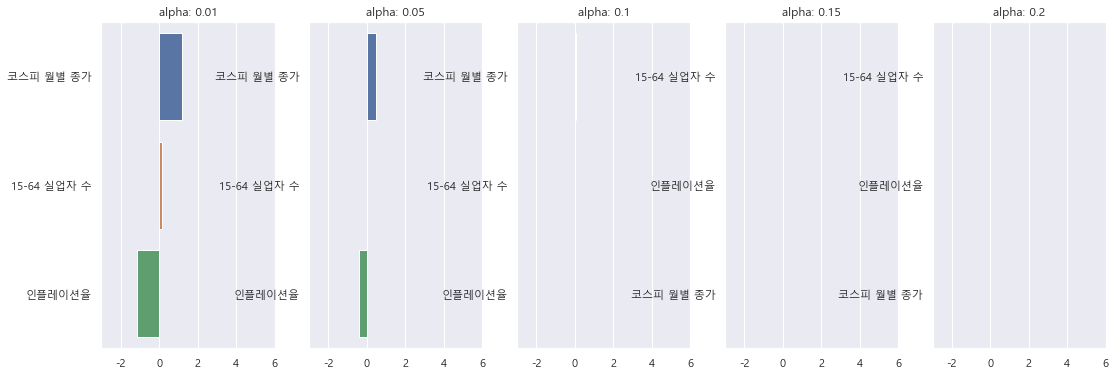

             alpha: 0.01  alpha: 0.05  alpha: 0.1  alpha: 0.15  alpha: 0.2
코스피 월별 종가       1.183402     0.486630    0.055305          0.0         0.0
15-64 실업자 수     0.126042     0.000000    0.000000          0.0         0.0
인플레이션율         -1.159219    -0.418058   -0.000000         -0.0        -0.0


In [37]:
# 구하고 싶은 알파는 따로 입력하고
alphas = [0.01, 0.05, 0.1, 0.15, 0.2]

# check_coeff(type, data, target, alpha)
# type = 'ridge', 'lasso', 'elastic'
check_coeff('elastic', feature_data_C, target, alphas)

In [38]:
feature_data_best = feature_data[['평균 LTV', '평균 DTI', '예금은행 대출금리', '미국 실효금리']]
feature_data_best

,평균 LTV,평균 DTI,예금은행 대출금리,미국 실효금리
0,0.779071,0.000000,0.796034,0.649781
1,0.738665,0.404489,0.787312,0.693071
2,0.717274,0.606252,0.768107,0.720255
3,0.732961,0.745031,0.742334,0.745719
4,0.752134,0.796137,0.733051,0.764852
...,...,...,...,...
209,0.659152,0.149045,0.413075,0.100949
210,0.656930,0.153740,0.419800,0.100949
211,0.657576,0.149973,0.410822,0.297752
212,0.650819,0.141091,0.424255,0.405310


In [39]:
from test_package import score_checker


find_best_alpha('elastic', feature_data_best[:161], target[:161])
score_checker('elastic', feature_data_best[:161], target[:161], 0.01)

Type : elastic | {'alpha': 0.02} | MSE : 0.28231428773152667 | RMSE: 0.5313325585088181
Alpha : 0.01
elastic Negative MSE score : [0.463 0.294 0.166 1.167 2.641]
elastic RMSE scores : [0.68  0.542 0.407 1.08  1.625]
elastic AVG RMSE : 0.867



In [40]:
# Best Feature Training
xe_train, xe_test, ye_train, ye_test = train_test_split(feature_data_best, target, test_size=0.25, random_state=25)
xe_model = ElasticNet(alpha=0.01, random_state=25)
xe_model.fit(xe_train, ye_train)
xe_pred = xe_model.predict(xe_test)

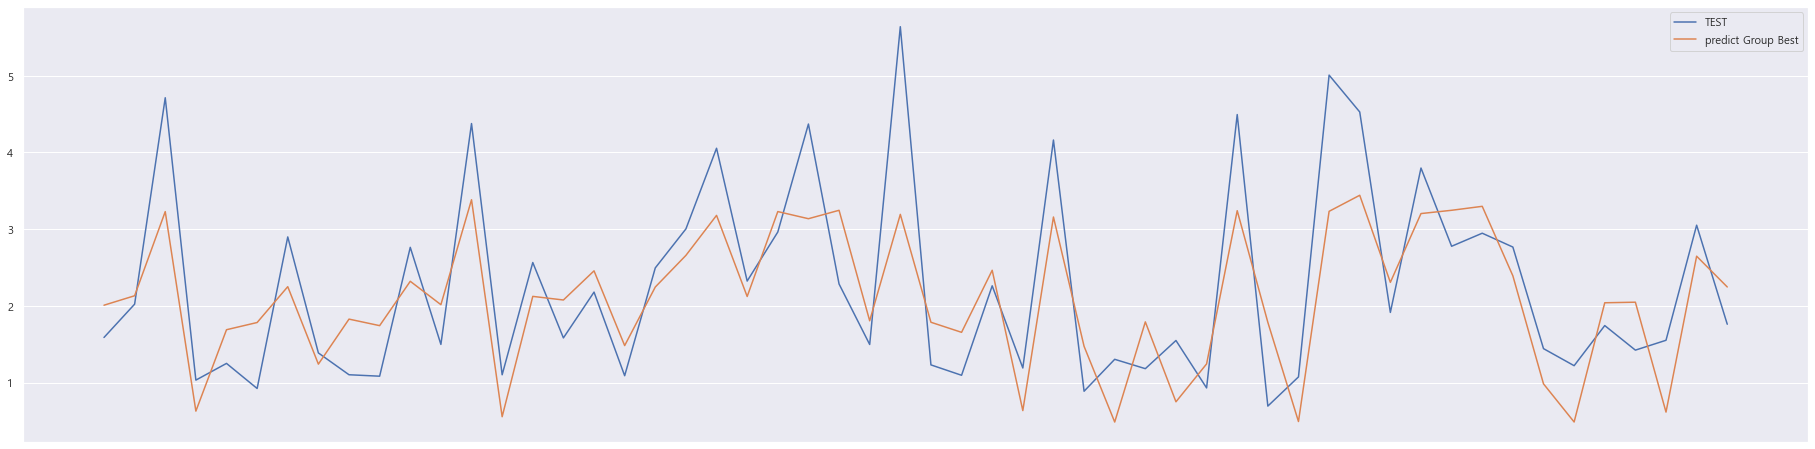

In [41]:
fig, axs = plt.subplots(1,1, figsize=(32,8))
#plt.xlabel("test")
plt.xticks(range(0,0))
plt.plot(ye_test, label="TEST")
plt.plot(xe_pred, label="predict Group Best")
plt.legend(loc='upper right')
plt.show()

In [42]:
xx_train = feature_data_best[:161]
xx_test = feature_data_best[161:]
yy_train = target[:161]
yy_test = target[161:]

test_model = ElasticNet(alpha=0.01, random_state=25)
test_model.fit(xx_train, yy_train)
test_pred = test_model.predict(xx_test)

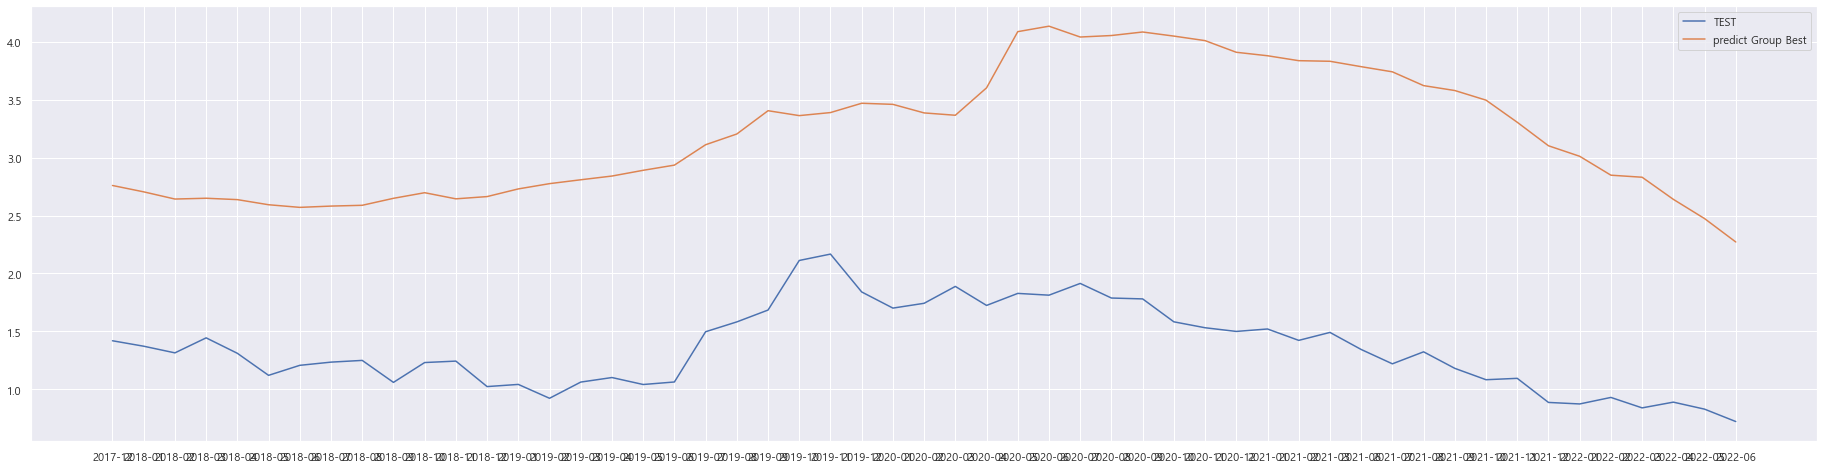

In [74]:
# 참고용
fig, axs = plt.subplots(1,1, figsize=(32,8))
#plt.xlabel("test")
plt.plot(yy_test, label="TEST")
plt.plot(test_pred, label="predict Group Best")
plt.legend(loc='upper right')
plt.show()

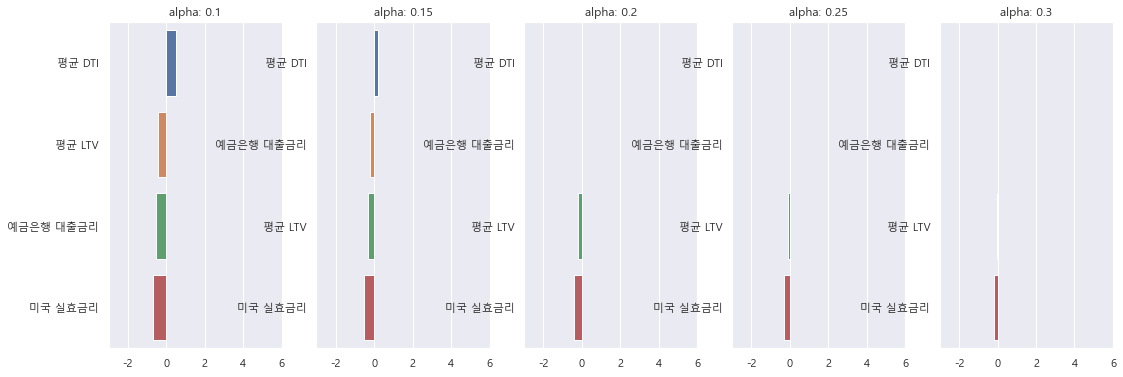

           alpha: 0.1  alpha: 0.15  alpha: 0.2  alpha: 0.25  alpha: 0.3
평균 DTI       0.513590     0.181450    0.000000     0.000000    0.000000
평균 LTV      -0.440037    -0.335735   -0.227536    -0.113200   -0.019004
예금은행 대출금리   -0.514451    -0.202006   -0.013170    -0.000000   -0.000000
미국 실효금리     -0.674159    -0.550578   -0.432979    -0.311954   -0.207880


In [44]:
alphas = [0.1, 0.15, 0.2, 0.25, 0.3]
check_coeff('elastic', feature_data_best, target, alphas)

In [45]:
feature_data_others = feature_data[['가중평균발행금리', '주택종합 매매가격지수', '소비자물가지수', '15-64 실업자 수', '코스피 월별 종가', '인플레이션율']]
feature_data_others

,가중평균발행금리,주택종합 매매가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,인플레이션율
0,0.922279,0.023902,0.000000,0.270948,0.044228,0.702174
1,0.860130,0.021056,0.015285,0.411797,0.000000,0.834290
2,0.807542,0.016809,0.036912,0.377595,0.059141,0.385088
3,0.771687,0.014553,0.036912,0.247920,0.084785,0.385088
4,0.741210,0.011992,0.036912,0.286896,0.084586,0.073353
...,...,...,...,...,...,...
209,0.011105,0.984391,0.932341,0.238626,0.857809,0.686548
210,0.010817,0.988598,0.946876,0.284627,0.866718,0.758501
211,0.005781,0.990610,0.964867,0.280079,0.881002,0.770460
212,0.000000,0.994898,0.983432,0.313914,0.865698,0.728874


In [46]:
find_best_alpha('elastic', feature_data_others[:161], target[:161])
score_checker('elastic', feature_data_others[:161], target[:161], 0.01)

Type : elastic | {'alpha': 0.01} | MSE : 0.6449465069873075 | RMSE: 0.8030856162248876
Alpha : 0.01
elastic Negative MSE score : [0.489 0.418 0.155 1.53  3.566]
elastic RMSE scores : [0.7   0.647 0.393 1.237 1.888]
elastic AVG RMSE : 0.973



In [47]:
# Other Feature Training
xf_train, xf_test, yf_train, yf_test = train_test_split(feature_data_others, target, test_size=0.25, random_state=25)
xf_model = ElasticNet(alpha=0.01, random_state=25)
xf_model.fit(xf_train, yf_train)
xf_pred = xf_model.predict(xf_test)

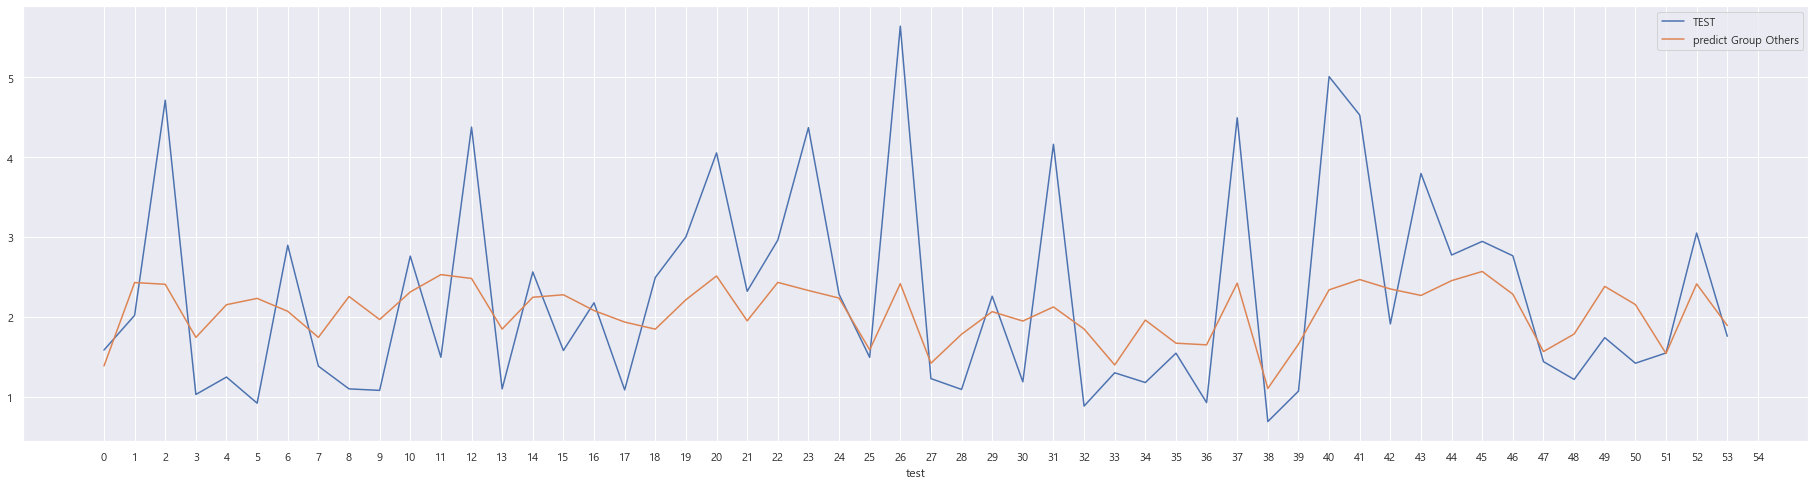

In [48]:
fig, axs = plt.subplots(1,1, figsize=(32,8))
plt.xlabel("test")
plt.xticks(range(55), range(55))
plt.plot(yf_test, label="TEST")
plt.plot(xf_pred, label="predict Group Others")
plt.legend(loc='upper right')
plt.show()

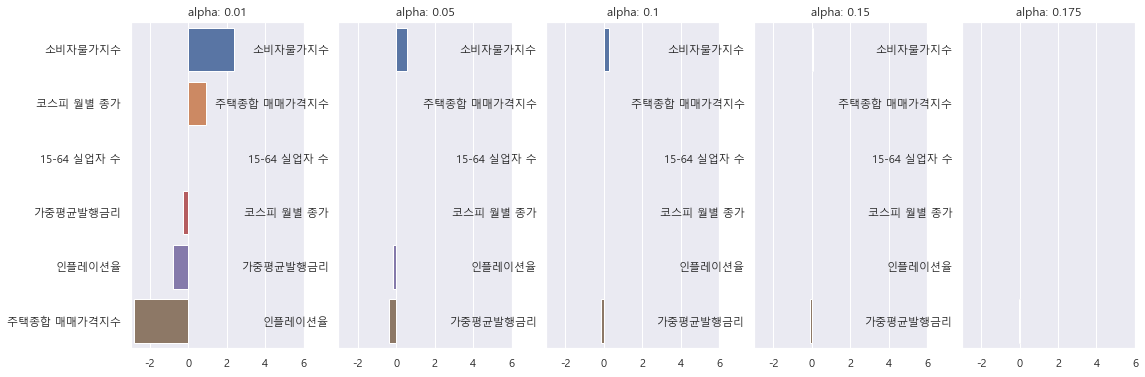

             alpha: 0.01  alpha: 0.05  alpha: 0.1  alpha: 0.15  alpha: 0.175
소비자물가지수         2.369769     0.545270    0.243707     0.072509      0.008035
코스피 월별 종가       0.904045     0.000000    0.000000     0.000000      0.000000
15-64 실업자 수    -0.030400     0.000000    0.000000     0.000000      0.000000
가중평균발행금리       -0.257354    -0.150519   -0.142154    -0.066327     -0.026899
인플레이션율         -0.784815    -0.349108   -0.000000    -0.000000     -0.000000
주택종합 매매가격지수    -2.817842    -0.000000   -0.000000     0.000000      0.000000


In [49]:
alphas = [0.01, 0.05, 0.1, 0.15, 0.175]
check_coeff('elastic', feature_data_others, target, alphas)

In [50]:
feature_data_real_best = feature_data[['평균 LTV', '평균 DTI', '예금은행 대출금리', '미국 실효금리', '소비자물가지수', '가중평균발행금리']]
feature_data_real_best

,평균 LTV,평균 DTI,예금은행 대출금리,미국 실효금리,소비자물가지수,가중평균발행금리
0,0.779071,0.000000,0.796034,0.649781,0.000000,0.922279
1,0.738665,0.404489,0.787312,0.693071,0.015285,0.860130
2,0.717274,0.606252,0.768107,0.720255,0.036912,0.807542
3,0.732961,0.745031,0.742334,0.745719,0.036912,0.771687
4,0.752134,0.796137,0.733051,0.764852,0.036912,0.741210
...,...,...,...,...,...,...
209,0.659152,0.149045,0.413075,0.100949,0.932341,0.011105
210,0.656930,0.153740,0.419800,0.100949,0.946876,0.010817
211,0.657576,0.149973,0.410822,0.297752,0.964867,0.005781
212,0.650819,0.141091,0.424255,0.405310,0.983432,0.000000


In [51]:
find_best_alpha('elastic', feature_data_real_best[:161], target[:161])
score_checker('elastic', feature_data_real_best[:161], target[:161], 0.01)

Type : elastic | {'alpha': 0.02} | MSE : 0.30422279936571994 | RMSE: 0.5515639576383866
Alpha : 0.01
elastic Negative MSE score : [0.472 0.285 0.163 1.162 3.403]
elastic RMSE scores : [0.687 0.534 0.404 1.078 1.845]
elastic AVG RMSE : 0.909



In [52]:
# real best Feature Training
xg_train, xg_test, yg_train, yg_test = train_test_split(feature_data_real_best, target, test_size=0.25, random_state=25)
xg_model = ElasticNet(alpha=0.01, random_state=25)
xg_model.fit(xg_train, yg_train)
xg_pred = xg_model.predict(xg_test)

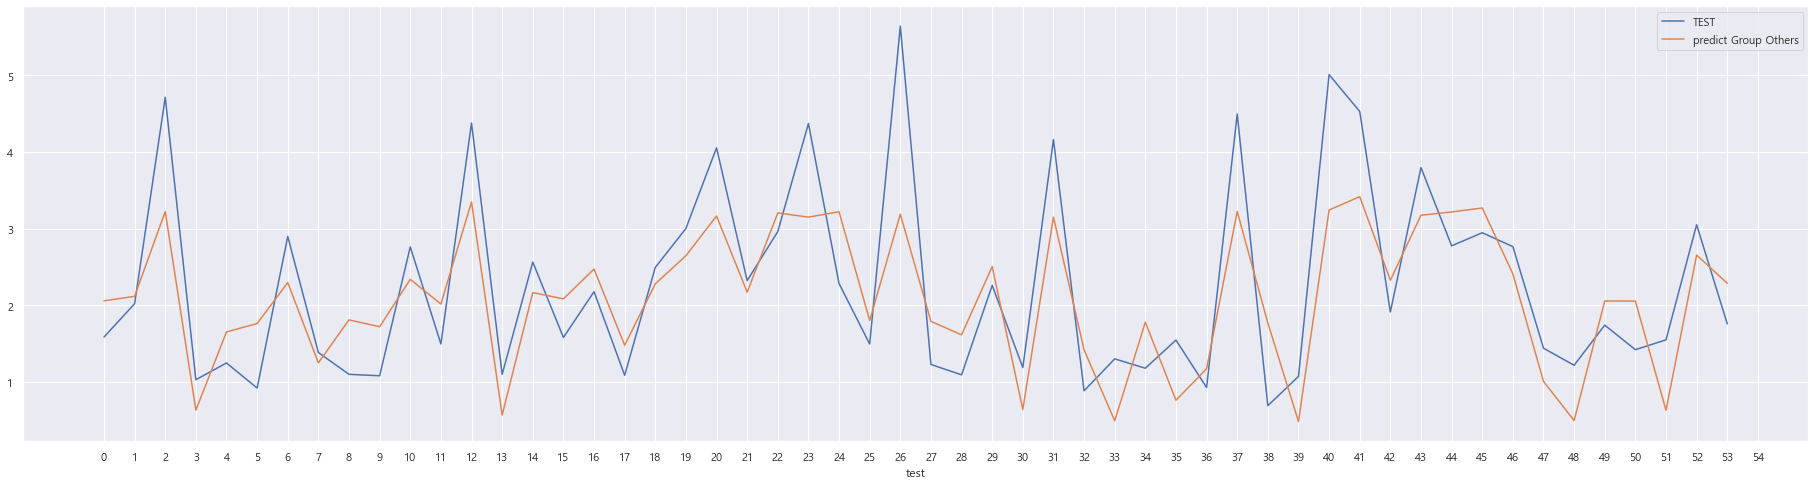

In [53]:
xs = data_a.index.to_list()


fig, axs = plt.subplots(1,1, figsize=(32,8))
plt.xlabel("test")
plt.xticks(range(55), range(55))
plt.plot(yg_test, label="TEST")
plt.plot(xg_pred, label="predict Group Others")
plt.legend(loc='upper right')
plt.show()

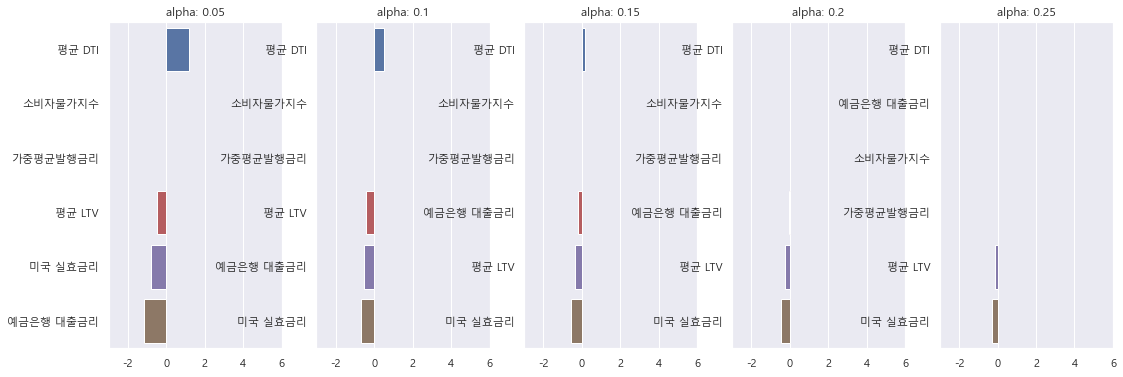

           alpha: 0.05  alpha: 0.1  alpha: 0.15  alpha: 0.2  alpha: 0.25
평균 DTI        1.199574    0.513590     0.181450    0.000000     0.000000
소비자물가지수       0.000000    0.000000     0.000000    0.000000     0.000000
가중평균발행금리     -0.004433   -0.000000    -0.000000   -0.000000    -0.000000
평균 LTV       -0.477082   -0.440037    -0.335735   -0.227536    -0.113200
미국 실효금리      -0.779342   -0.674159    -0.550578   -0.432979    -0.311954
예금은행 대출금리    -1.135045   -0.514451    -0.202006   -0.013170    -0.000000


In [54]:
alphas = [0.05, 0.1, 0.15, 0.2, 0.25]
check_coeff('elastic', feature_data_real_best, target, alphas)

In [55]:
# 최종검증
from sklearn.metrics import mean_squared_error

mse_a = mean_squared_error(ya_test, xa_pred)
rmse_a = mse_a ** 0.5

mse_b = mean_squared_error(yb_test, xb_pred)
rmse_b = mse_b ** 0.5

mse_c = mean_squared_error(yc_test, xc_pred)
rmse_c = mse_c ** 0.5

mse_all = mean_squared_error(yd_test, xd_pred)
rmse_all = mse_all ** 0.5

mse_best = mean_squared_error(ye_test, xe_pred)
rmse_best = mse_best ** 0.5

mse_others = mean_squared_error(yf_test, xf_pred)
rmse_others = mse_others ** 0.5

mse_real_best = mean_squared_error(yg_test, xg_pred)
rmse_real_best = mse_real_best ** 0.5

print(f'금리 요인 RMSE : {rmse_a:.3f}')
print(f'부동산 요인 RMSE : {rmse_b:.3f}')
print(f'거시경제 요인 RMSE : {rmse_c:.3f}')
print(f'전체 요인 RMSE : {rmse_all:.3f}')
print(f'전체 요인 중 가장 영향력 높은 RMSE : {rmse_best:.3f}')
print(f'영향력 높은 요인을 제외한 나머지 RMSE : {rmse_others:.3f}')
print(f'상환율에 영향을 준다고 판단된 요인 RMSE : {rmse_real_best:.3f}')

금리 요인 RMSE : 1.020
부동산 요인 RMSE : 1.015
거시경제 요인 RMSE : 1.231
전체 요인 RMSE : 0.701
전체 요인 중 가장 영향력 높은 RMSE : 0.769
영향력 높은 요인을 제외한 나머지 RMSE : 1.096
상환율에 영향을 준다고 판단된 요인 RMSE : 0.765


In [56]:
## elasticnet 잘 됐는지 스코어 확인해보기 (구경만 하세요)

print(f'전체 요인 훈련셋 점수 : {xd_model.score(xd_train, yd_train):.3f}')
print(f'전체 요인 테스트 점수 : {xd_model.score(xd_test, yd_test):.3f}\n')

print(f'금리 요인 훈련셋 점수 : {xb_model.score(xb_train, yb_train):.3f}')
print(f'금리 요인 테스트 점수 : {xb_model.score(xb_test, yb_test):.3f}\n')

print(f'부동산 요인 훈련셋 점수 : {xc_model.score(xc_train, yc_train):.3f}')
print(f'부동산 요인 테스트 점수 : {xc_model.score(xc_test, yc_test):.3f}\n')

print(f'거시경제 요인 훈련셋 점수 : {xa_model.score(xa_train, ya_train):.3f}')
print(f'거시경제 요인 테스트 점수 : {xa_model.score(xa_test, ya_test):.3f}\n')

print(f'베스트 요인 훈련셋 점수 : {xe_model.score(xe_train, ye_train):.3f}')
print(f'베스트 요인 테스트 점수 : {xe_model.score(xe_test, ye_test):.3f}\n')

print(f'기타 요인 훈련셋 점수 : {xf_model.score(xf_train, yf_train):.3f}')
print(f'기타 요인 테스트 점수 : {xf_model.score(xf_test, yf_test):.3f}\n')

print(f'진짜 베스트 요인 훈련셋 점수 : {xg_model.score(xg_train, yg_train):.3f}')
print(f'진짜 베스트 요인 테스트 점수 : {xg_model.score(xg_test, yg_test):.3f}')


전체 요인 훈련셋 점수 : 0.535
전체 요인 테스트 점수 : 0.694

금리 요인 훈련셋 점수 : 0.206
금리 요인 테스트 점수 : 0.358

부동산 요인 훈련셋 점수 : 0.095
부동산 요인 테스트 점수 : 0.056

거시경제 요인 훈련셋 점수 : 0.306
거시경제 요인 테스트 점수 : 0.352

베스트 요인 훈련셋 점수 : 0.491
베스트 요인 테스트 점수 : 0.632

기타 요인 훈련셋 점수 : 0.189
기타 요인 테스트 점수 : 0.252

진짜 베스트 요인 훈련셋 점수 : 0.497
진짜 베스트 요인 테스트 점수 : 0.636


In [57]:
# Best Model Evaluation?
from test_package import alpha_master

alpha_master('elastic',feature_data_best[:161],target[:161])

Type : elastic | {'alpha': 0.02} | MSE : 0.28231428773152667 | RMSE: 0.5313325585088181
Alpha : 0.02
elastic Negative MSE score : [0.443 0.253 0.202 1.263 2.451]
elastic RMSE scores : [0.666 0.503 0.45  1.124 1.566]
elastic AVG RMSE : 0.862



In [58]:
# R2 확인 - OLS 분석
import statsmodels.api as sm

lm = sm.OLS(list(target), feature_data_best)
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.858
Model:                            OLS   Adj. R-squared (uncentered):              0.856
Method:                 Least Squares   F-statistic:                              318.3
Date:                Wed, 31 Aug 2022   Prob (F-statistic):                    6.55e-88
Time:                        14:01:50   Log-Likelihood:                         -289.54
No. Observations:                 214   AIC:                                      587.1
Df Residuals:                     210   BIC:                                      600.5
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
평균 LTV         1.8126      0.288      6.301      0.000       1.246       2.380
평균 DTI         5.6120      0.237     23.713      0.000       5.145       6.079
예금은행 대출금리     -3.8809      0.334    -11.634      0.000      -4.539      -3.223
미국 실효금리       -1.0276      0.298     -3.454      0.001      -1.614      -0.441
==============================================================================
Omnibus:                       57.658   Durbin-Watson:                   0.482
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              412.438
Skew:                           0.795   Prob(JB):                     2.76e-90
Kurtosis:                       9.613   Cond. No.                         7.05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

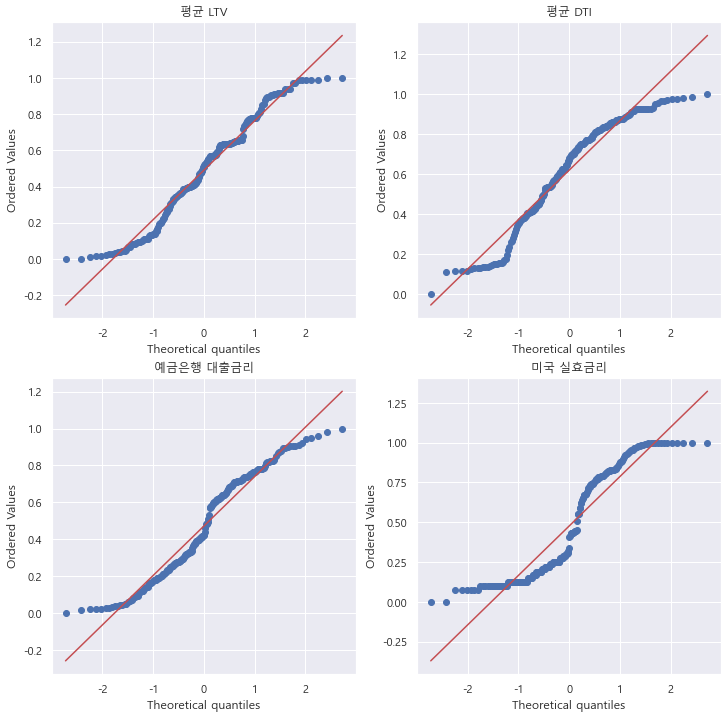

In [59]:
# 여기 그래프는 참고사항이면 될 거 같고
# 보여주고 싶으면 스케일링 하고 나서 모든 변수에 대해 보여주면 좋지 않을까

from scipy import stats

fig, axes = plt.subplots(2, 2)
fig.set_size_inches((12,12))
plt.rc('font', family='Malgun Gothic') ## 한글 깨짐 설정

stats.probplot(feature_data_best["평균 LTV"], dist=stats.norm, plot=axes[0,0])
axes[0,0].title.set_text("평균 LTV")
stats.probplot(feature_data_best["평균 DTI"], dist=stats.norm, plot=axes[0,1])
axes[0,1].title.set_text("평균 DTI")
stats.probplot(feature_data_best["예금은행 대출금리"], dist=stats.norm, plot=axes[1,0])
axes[1,0].title.set_text("예금은행 대출금리")
stats.probplot(feature_data_best["미국 실효금리"], dist=stats.norm, plot=axes[1,1])
axes[1,1].title.set_text("미국 실효금리")

In [60]:
# 이제 저 best feature를 가지고 다중회귀를 한다면?
# 이 결과는 우리가 릿지나 라쏘 엘라스틱을 써야한다는 정당성에 대한 확보가 될 것 같기도 하네...
# 단순 선형회귀와 비교했을 때 파이프라인 넣고 다항식으로 만들면 R^2 값이 참 좋아지더라를 보여주면 끝날듯..?

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

pipe_test = Pipeline([('poly', PolynomialFeatures(degree=3,include_bias=False)), ('Linear', LinearRegression())])
x_best_train, x_best_test, y_best_train, y_best_test = train_test_split(feature_data_best, target, test_size=0.25, random_state=25)
pipe_test.fit(x_best_train, y_best_train)
pipe_preds = pipe_test.predict(x_best_test)

mse_best_a = mean_squared_error(y_best_test, pipe_preds)
rmse_best_a = np.sqrt(mse_best_a)

print(f'MSE : {mse_best_a} | RMSE : {rmse_best_a}')
print(f'R-Square : {r2_score(y_best_test, pipe_preds)}')

MSE : 0.16097102841577154 | RMSE : 0.4012119494927482
R-Square : 0.8997255199472731


In [61]:
# 그냥 다중선형회귀
reg = LinearRegression()
x_best_train2, x_best_test2, y_best_train2, y_best_test2 = train_test_split(feature_data_best, target, test_size=0.25, random_state=25)
reg.fit(x_best_train2, y_best_train2)
reg_preds = reg.predict(x_best_test2)

mse_best_b = mean_squared_error(y_best_test, reg_preds)
rmse_best_b = np.sqrt(mse_best_b)

print(f'MSE : {mse_best_b} | RMSE : {rmse_best_b}')
print(f'R-Square : {r2_score(y_best_test, reg_preds)}')

MSE : 0.5592001461227986 | RMSE : 0.747796861535804
R-Square : 0.651654683145588


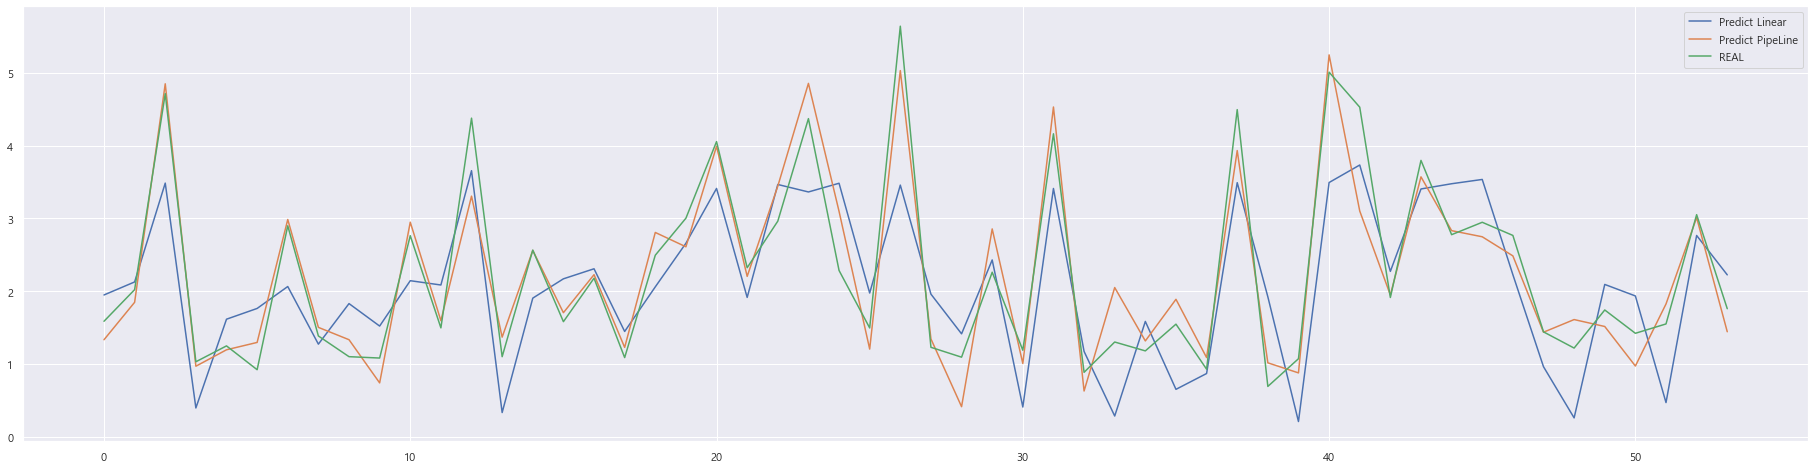

In [81]:
# 그래프 그릴거
# 1. 예측값과 그냥 단순하게 선형회귀 만든 것과 파이프라인으로 만든 거 예측값 비교해보기 (feature_all 가지고 해보는 건... 음.. 할까?)
# 2. 그냥 단순히 선형회귀 한 거 가지고 직선으로 만든 선형 그래프과 target plot 산점도
# 3. 파이프라인으로 N차 함수 만든 선형 그래프와 target plot 산점도

plt.figure(figsize=(32,8))
plt.plot(reg.predict(x_best_test), label="Predict Linear")
plt.plot(pipe_preds, label="Predict PipeLine")
plt.plot(y_best_test.values.reshape(-1,1), label="REAL") # Target Test Set
#plt.plot(target[161:], label="TARGET")
plt.legend(loc='best')
plt.show()

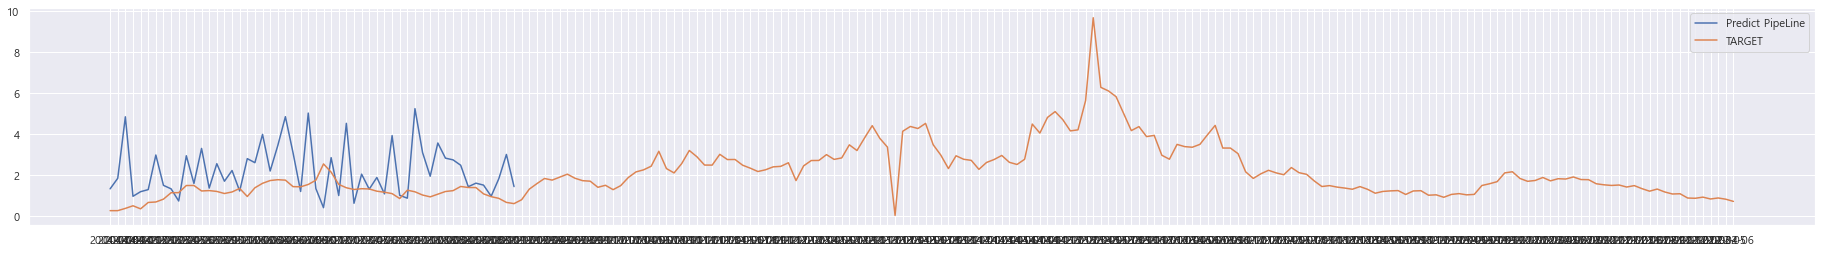

In [63]:
# 저 아래에 있는 산점도, 라인 그래프를 그리고 싶었으나 실패한 것
plt.figure(figsize=(32,4))
plt.plot(pipe_preds, label="Predict PipeLine")
#plt.plot(y_best_test, label="BEST TEST")
plt.plot(target, label="TARGET")
plt.legend(loc='best')
plt.show()

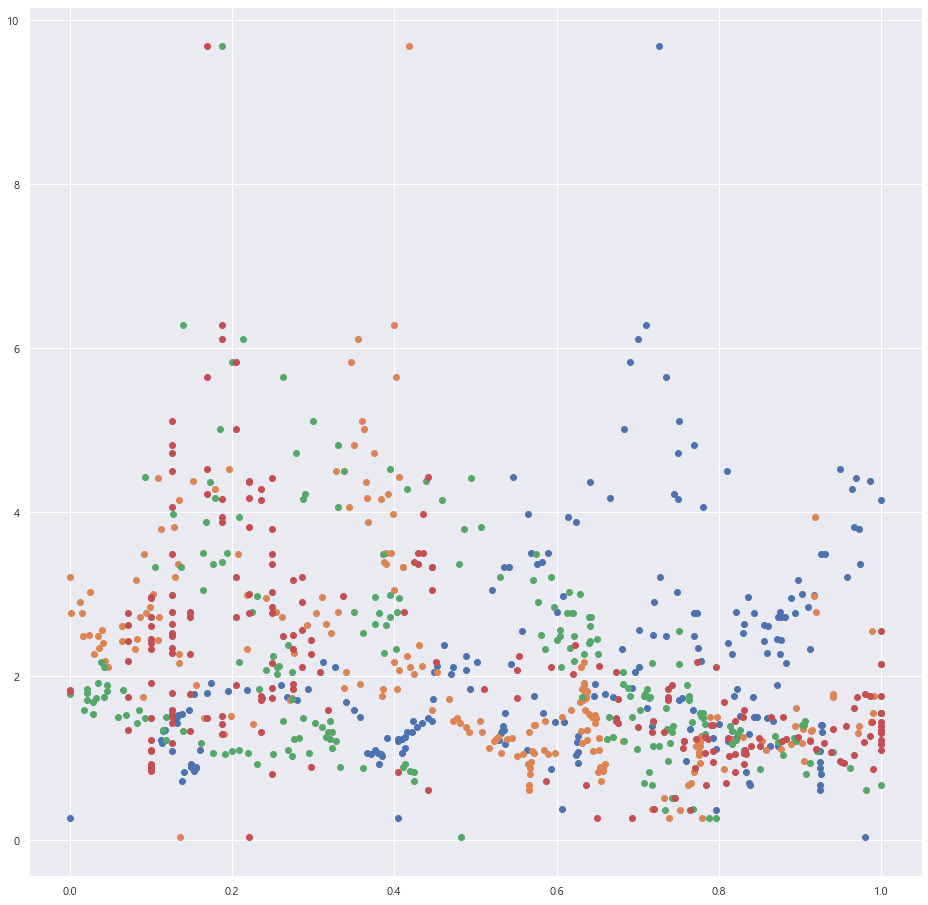

In [64]:
# 저 아래에 있는 산점도, 라인 그래프를 그리고 싶었으나 실패한 것 22
plt.scatter(feature_data_best['평균 DTI'], target)
plt.scatter(feature_data_best['평균 LTV'], target)
plt.scatter(feature_data_best['예금은행 대출금리'], target)
plt.scatter(feature_data_best['미국 실효금리'], target)
plt.show()

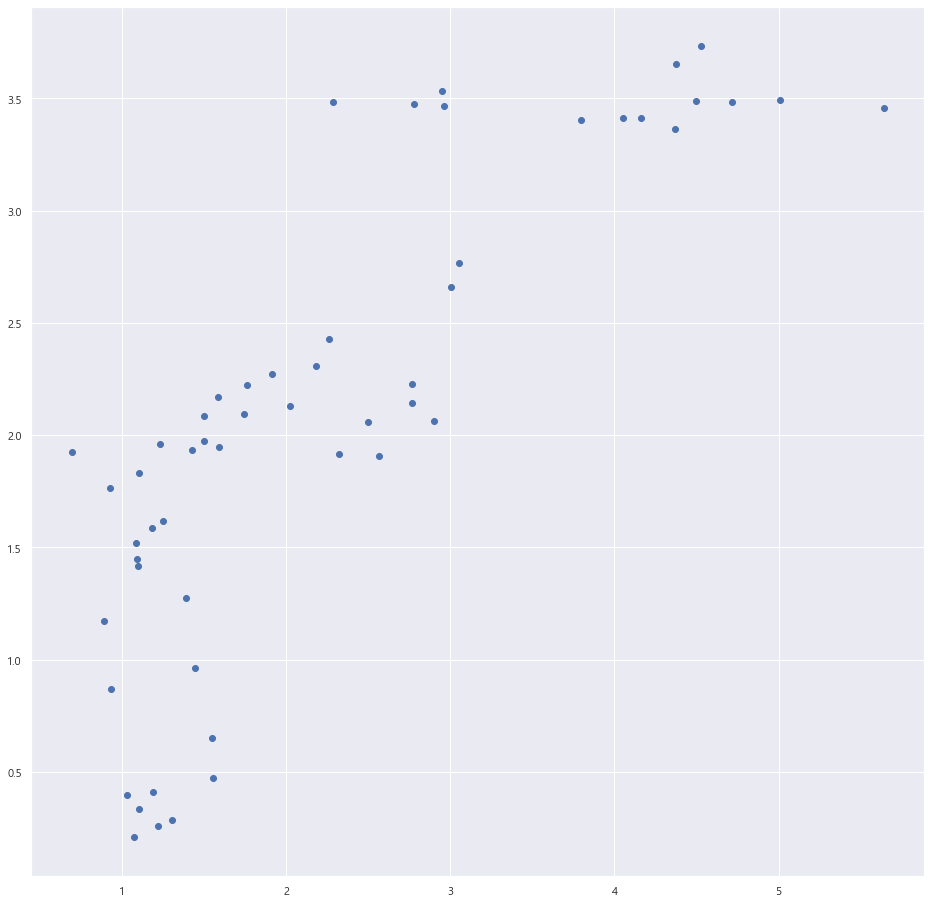

In [65]:
# Scatter with rinear_pred, target

plt.scatter(y_best_test, reg.predict(x_best_test))
plt.show()

In [66]:
reg.score(x_best_train, y_best_train)

0.5108615318616951

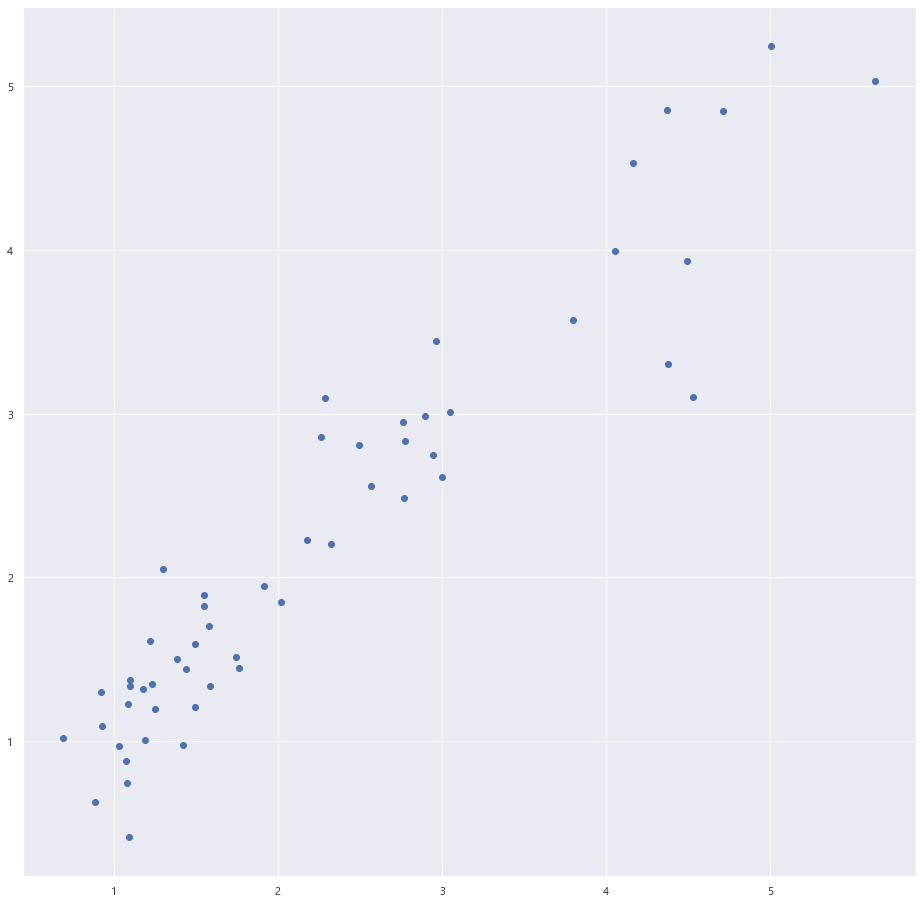

In [67]:
# scatter with pipe regression

plt.scatter(y_best_test, pipe_preds)
#lt.plot(y_best_test, pipe_preds)
plt.show()

In [68]:
pipe_test.score(x_best_train, y_best_train)

0.8365358169457271

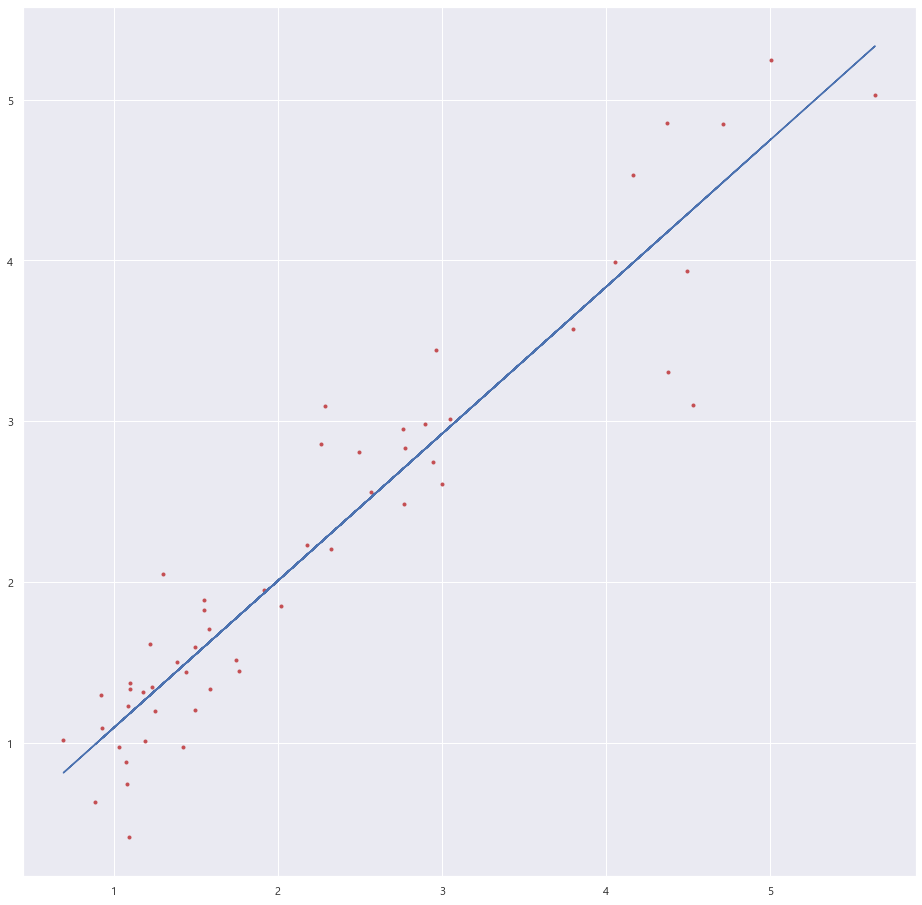

In [69]:
from scipy import stats, polyval

slope, intercept, r_value, p_value, stderr = stats.linregress(y_best_test, pipe_preds)
ry = polyval([slope, intercept], y_best_test)
plt.figure(figsize=(16,16))
plt.plot(y_best_test, pipe_preds, 'r.')
plt.plot(y_best_test, ry, 'b-')
plt.show()

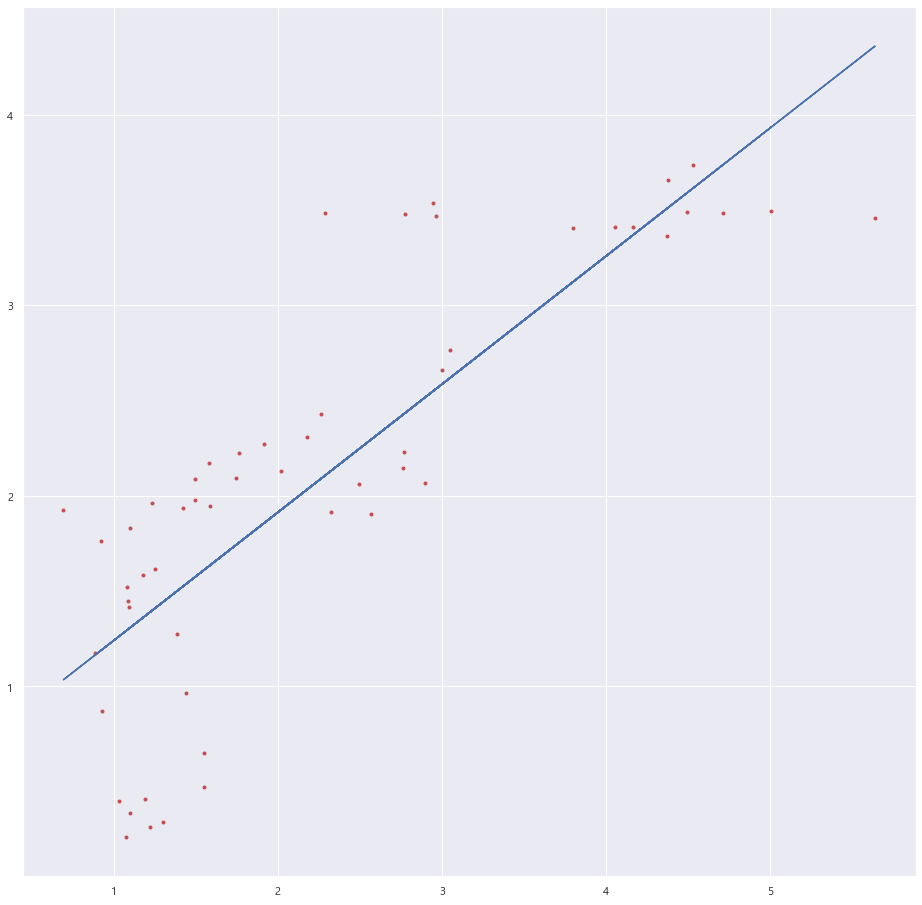

In [70]:
slope, intercept, r_value, p_value, stderr = stats.linregress(y_best_test, reg_preds)
ry = polyval([slope, intercept], y_best_test)
plt.plot(y_best_test, reg_preds, 'r.')
plt.plot(y_best_test, ry, 'b-')
plt.show()

In [71]:
# 데이터 프레임 만들 때 df.index.name = XX 지정 안 했으면 이름이 없어요
# 이름 넣고 싶으면 별도로 리스트 만들어서 지정해주던가 처음부터 만들어주세요

datas = [feature_data, feature_data_A, feature_data_B, feature_data_C]
names = ['feature_all', 'feature_A', 'feature_B', 'feature_C']
num = range(1,len(datas)+1)

### >> for문에 들어가는 변수의 위치(feature_data는 0)도 VIF출력할 때 번호 붙여서 같이 출력(근데 번호는 1부터 시작하고 싶음)
### 요인들 번호 매기고 VIF 출력
for num, data in zip(num, datas):
        datas[num-1].index.name = names[num-1]
        print(f'번호 {num} - 데이터 이름 {datas[num-1].index.name}')
        find_vif(data)
        print(' ')

번호 1 - 데이터 이름 feature_all
    VIF Factor     features
0   261.241836      소비자물가지수
1   188.899086  주택종합 매매가격지수
2   100.422620    예금은행 대출금리
3    89.887638         CD금리
4    58.217633    코스피 월별 종가
5    51.457136     가중평균발행금리
6    41.203057       평균 DTI
7    14.545115       평균 LTV
8    13.148261      미국 실효금리
9     8.951877       인플레이션율
10    7.608924  15-64 실업자 수
 
번호 2 - 데이터 이름 feature_A
   VIF Factor   features
0   28.404601  예금은행 대출금리
1   24.658323   가중평균발행금리
2    2.971325    미국 실효금리
 
번호 3 - 데이터 이름 feature_B
   VIF Factor     features
0    2.659064       평균 LTV
1    2.375083       평균 DTI
2    2.321795  주택종합 매매가격지수
 
번호 4 - 데이터 이름 feature_C
   VIF Factor     features
0    7.141412    코스피 월별 종가
1    5.110120       인플레이션율
2    4.081643  15-64 실업자 수
 


In [72]:
from test_package import alpha_master, find_best_alpha

### 75% 수준의 데이터만 가지고 돌렸을 때
datas = [feature_data, feature_data_A, feature_data_B, feature_data_C]
names = ['feature_all', 'feature_A', 'feature_B', 'feature_C']
types = ['ridge', 'lasso', 'elastic']
num = range(1,len(datas)+1)

# ### >> 모델 하나의 알파값을 구하는데 포문으로 모든 요인변수 돌리고나서 다 끝나면 다른 모델 넣어서 반복
# ### 모든 변수를 모델에 대입했을 때 최적의 앒파값 구하기
# for type in types:
#     print(" ")
#     print(type)

for num, data in zip(num, datas):
    datas[num-1].index.name = names[num-1]
    print(datas[num-1].index.name)
    for i in range(0, len(types)):
        alpha_master(types[i], data[:161], target[:161])

### 여기에 요인변수랑 모델이랑 이 함수에 넣고 돌렸을 때 나오는 최적의 알파값을
### 이 다음 코드에 변수와 모델에 맞게 대입해서 최적의 RMSE를 한번에 구하고 싶음
### find_best_alpha + score_checker
### alpha_master('elastic', feature_data, target)

feature_all
Type : ridge | {'alpha': 1.0} | MSE : 0.2886123751534881 | RMSE: 0.5372265584960297
Alpha : 1.0
ridge Negative MSE score : [0.422 0.207 0.184 1.139 4.356]
ridge RMSE scores : [0.65  0.454 0.429 1.067 2.087]
ridge AVG RMSE : 0.937

Type : lasso | {'alpha': 0.01} | MSE : 0.21164534165833393 | RMSE: 0.46004928177134885
Alpha : 0.01
lasso Negative MSE score : [0.574 0.152 0.151 1.105 3.373]
lasso RMSE scores : [0.758 0.39  0.388 1.051 1.837]
lasso AVG RMSE : 0.885

Type : elastic | {'alpha': 0.01} | MSE : 0.14391019205910932 | RMSE: 0.3793549684123161
Alpha : 0.01
elastic Negative MSE score : [0.347 0.188 0.177 1.135 3.559]
elastic RMSE scores : [0.589 0.434 0.42  1.065 1.886]
elastic AVG RMSE : 0.879

feature_A
Type : ridge | {'alpha': 1.0} | MSE : 0.323795914966654 | RMSE: 0.5690306801629013
Alpha : 1.0
ridge Negative MSE score : [0.448 0.274 0.2   1.217 2.682]
ridge RMSE scores : [0.669 0.524 0.447 1.103 1.638]
ridge AVG RMSE : 0.876

Type : lasso | {'alpha': 0.03} | MSE : 0